# Cat or Dog? Using LeNet and variations of LeNet architecture to create a Deep Learning Neural Network capable of identifying cats or dogs 
Done By: Alastair Tan

Dataset: https://www.kaggle.com/datasets/tongpython/cat-and-dog\
Date Accessed: 07 March 2025

## Requirements:

anyio==4.8.0\
argon2-cffi==23.1.0\
argon2-cffi-bindings==21.2.0\
arrow==1.3.0\
asttokens==3.0.0\
async-lru==2.0.4\
attrs==25.1.0\
babel==2.17.0\
beautifulsoup4==4.13.3\
bleach==6.2.0\
certifi==2025.1.31\
cffi==1.17.1\
charset-normalizer==3.4.1\
comm==0.2.2\
contourpy==1.3.1\
cycler==0.12.1\
debugpy==1.8.13\
decorator==5.2.1\
defusedxml==0.7.1\
executing==2.2.0\
fastjsonschema==2.21.1\
filelock==3.17.0\
fonttools==4.56.0\
fqdn==1.5.1\
fsspec==2025.3.0\
h11==0.14.0\
httpcore==1.0.7\
httpx==0.28.1\
idna==3.10\
ipykernel==6.29.5\
ipython==9.0.1\
ipython_pygments_lexers==1.1.1\
ipywidgets==8.1.5\
isoduration==20.11.0\
jedi==0.19.2\
Jinja2==3.1.6\
json5==0.10.0\
jsonpointer==3.0.0\
jsonschema==4.23.0\
jsonschema-specifications==2024.10.1\
jupyter==1.1.1\
jupyter-console==6.6.3\
jupyter-events==0.12.0\
jupyter-lsp==2.2.5\
jupyter_client==8.6.3\
jupyter_core==5.7.2\
jupyter_server==2.15.0\
jupyter_server_terminals==0.5.3\
jupyterlab==4.3.5\
jupyterlab_pygments==0.3.0\
jupyterlab_server==2.27.3\
jupyterlab_widgets==3.0.13\
kiwisolver==1.4.8\
lab==8.4\
MarkupSafe==3.0.2\
matplotlib==3.10.1\
matplotlib-inline==0.1.7\
mistune==3.1.2\
mpmath==1.3.0\
nbclient==0.10.2\
nbconvert==7.16.6\
nbformat==5.10.4\
nest-asyncio==1.6.0\
networkx==3.4.2\
notebook==7.3.2\
notebook_shim==0.2.4\
numpy==2.2.3\
nvidia-cublas-cu12==12.4.5.8\
nvidia-cuda-cupti-cu12==12.4.127\
nvidia-cuda-nvrtc-cu12==12.4.127\
nvidia-cuda-runtime-cu12==12.4.127\
nvidia-cudnn-cu12==9.1.0.70\
nvidia-cufft-cu12==11.2.1.3\
nvidia-curand-cu12==10.3.5.147\
nvidia-cusolver-cu12==11.6.1.9\
nvidia-cusparse-cu12==12.3.1.170\
nvidia-cusparselt-cu12==0.6.2\
nvidia-nccl-cu12==2.21.5\
nvidia-nvjitlink-cu12==12.4.127\
nvidia-nvtx-cu12==12.4.127\
overrides==7.7.0\
packaging==24.2\
pandas==2.2.3\
pandocfilters==1.5.1\
parso==0.8.4\
pexpect==4.9.0\
pillow==11.1.0\
platformdirs==4.3.6\
prometheus_client==0.21.1\
prompt_toolkit==3.0.50\
psutil==7.0.0\
ptyprocess==0.7.0\
pure_eval==0.2.3\
pycparser==2.22\
Pygments==2.19.1\
pyparsing==3.2.1\
python-dateutil==2.9.0.post0\
python-json-logger==3.3.0\
pytz==2025.1\
PyYAML==6.0.2\
pyzmq==26.2.1\
referencing==0.36.2\
requests==2.32.3\
rfc3339-validator==0.1.4\
rfc3986-validator==0.1.1\
rpds-py==0.23.1\
Send2Trash==1.8.3\
setuptools==75.8.2\
simplejson==3.20.1\
six==1.17.0\
sniffio==1.3.1\
soupsieve==2.6\
stack-data==0.6.3\
sympy==1.13.1\
terminado==0.18.1\
tinycss2==1.4.0\
torch==2.6.0\
torchvision==0.21.0\
tornado==6.4.2\
traitlets==5.14.3\
triton==3.2.0\
txt2tags==3.9\
types-python-dateutil==2.9.0.20241206\
typing_extensions==4.12.2\
tzdata==2025.1\
uri-template==1.3.0\
urllib3==2.3.0\
wcwidth==0.2.13\
webcolors==24.11.1\
webencodings==0.5.1\
websocket-client==1.8.0\
widgetsnbextension==4.0.13\

In [1]:
# All required imports

import numpy as np
import matplotlib.pyplot as plt
import torch, torchvision
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms

## LeNet

LeNet consists of the following layers:\
\
LeNet( \
  (cn1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1)) \
  (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False) \
  (cn2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))\
  (maxpool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)\
  (flatten1): Flatten(start_dim=1, end_dim=-1)\
  (fc1): Linear(in_features=400, out_features=120, bias=True)\
  (fc2): Linear(in_features=120, out_features=84, bias=True)\
  (fc3): Linear(in_features=84, out_features=10, bias=True)\
)

In [2]:
# LeNet was created by AT&T, named after Yann LeCun
# Image size is resized to 32x32, as per CIFAR10 size
# The first linear layer must be sized based on the size of the kernels, and the size of the images used to train/test after resizing

class LeNet(nn.Module):

    def __init__(self):
        super(LeNet, self).__init__()
        # 3 input image channel, 6 output feature maps and 5x5 conv kernel
        self.cn1 = nn.Conv2d(3, 6, 5) # (32-5+0)/1 + 1 => 28 * 28 * 6
        self.maxpool1 = nn.MaxPool2d(2)
        # After pooling, 28/2 => 14 * 14 * 6
        # 6 input image channel, 16 output feature maps and 5x5 conv kernel
        self.cn2 = nn.Conv2d(6, 16, 5) # (14-5+0)/1 + 1 = 10 * 10 * 16
        self.maxpool2 = nn.MaxPool2d(2)
        # fully connected layers of size 120, 84 and 10
        # After pooling, 10/2 => 5 * 5 * 16
        self.flatten1 = nn.Flatten()
        self.fc1 = nn.Linear(16 * 5 * 5, 120)  # 5*5 is the spatial dimension at this layer
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Convolution with 5x5 kernel
        x = F.relu(self.cn1(x))
        # Max pooling over a (2, 2) window        
        x = self.maxpool1(x)
        # Convolution with 5x5 kernel
        x = F.relu(self.cn2(x))
        # Max pooling over a (2, 2) window        
        x = self.maxpool2(x)
        # Flatten spatial and depth dimensions into a single vector        
        x = self.flatten1(x)
        # Fully connected operations
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def flattened_features(self, x):
        # all except the first (batch) dimension
        size = x.size()[1:]  
        num_feats = 1
        for s in size:
            num_feats *= s
        return num_feats

def train(net, trainloader, optim, epoch):
    # initialize loss
    final_loss_total = 0.0
    num_batches = 0
    success = 0
    counter = 0
    
    for i, data in enumerate(trainloader, 0):
        num_batches += 1
        # get the inputs; data is a list of [inputs, labels]
        # ip refers to the input images, and ground_truth refers to the output classes the images belong to
        ip, ground_truth = data
        ip = ip.to(device)
        ground_truth = ground_truth.to(device)

        # zero the parameter gradients
        optim.zero_grad()

        op = net(ip) # forward pass        
        loss = nn.CrossEntropyLoss()(op, ground_truth) # get the loss
        loss.backward() # use loss to perform a backward pass
        optim.step() # optimisation step

        _, pred = torch.max(op.data, 1) # Get the predictions for purpose of accuracy
        counter += ground_truth.size(0)
        success += (pred == ground_truth).sum().item()

        # update loss
        final_loss_total += loss.item()        

    accuracy = 100 * success / counter
    print('[Epoch number : %d] accuracy: %.3f, loss: %.3f' % (epoch + 1, accuracy, final_loss_total / num_batches))
    return final_loss_total / num_batches, accuracy

def test(net, testloader, train_test="test"):
    success = 0
    counter = 0
    num_batches = 0
    loss_total = 0.0
    with torch.no_grad():
        for data in testloader:
            num_batches += 1
            im, ground_truth = data

            im = im.to(device)
            ground_truth = ground_truth.to(device)
            
            op = net(im)
            _, pred = torch.max(op.data, 1)
            loss = nn.CrossEntropyLoss()(op, ground_truth)
            # update loss
            loss_total += loss.item()
            
            counter += ground_truth.size(0)
            success += (pred == ground_truth).sum().item()

    accuracy = 100 * success / counter
    print(f"LeNet accuracy on {len(testloader.dataset)} images from {train_test} dataset: {accuracy}. Loss: {loss_total / num_batches}")
    # Return loss
    return loss_total / num_batches, accuracy

# Making the code device-agnostic
device = 'cuda' if torch.cuda.is_available() else 'cpu'

lenet = LeNet()
lenet.to(device)
print(lenet)

LeNet(
  (cn1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (cn2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (maxpool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (flatten1): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


## Transforms

-Random horizontal flip adds a small level of image augmentation that helps the model identify meaningful patterns better. Horizontal flip is not applied to the test dataset.
-The image is resized to 32x32, as per CIFAR10's image sizes.
-The normalisation parameters are from ImageNET.

# Batch Size:
Batch size is set to 32. This does not change throughout the project.

# Image Dataset size:
There are 8005 training data images, and 2023 test data images. There is roughly an equal balance of cat and dog-labelled images. 

In [3]:
train_transform = transforms.Compose([transforms.RandomHorizontalFlip(),
                                      transforms.Resize(size=(32,32), antialias=True),
                                      transforms.ToTensor(),
                                      transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))])

train_dataset = torchvision.datasets.ImageFolder(root="catdog/training_set", transform=train_transform)

trainloader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)

test_transform = transforms.Compose([transforms.Resize(size=(32,32), antialias=True), transforms.ToTensor(), transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))])

test_dataset = torchvision.datasets.ImageFolder(root="catdog/test_set", transform=test_transform)

testloader = torch.utils.data.DataLoader(test_dataset, batch_size=len(test_dataset), shuffle=False)

classes = ('cat', 'dog')

# Print labels
print(f"Number of training data items: {len(train_dataset)}") 
print(f"Number of test data items: {len(test_dataset)}") 
print(f"Number of cat labels in training: {sum(1 for i in train_dataset.targets if i == 0)}")
print(f"Number of dog labels in training: {sum(1 for i in train_dataset.targets if i == 1)}")
print(f"Number of cat labels in test: {sum(1 for i in test_dataset.targets if i == 0)}")
print(f"Number of dog labels in test: {sum(1 for i in test_dataset.targets if i == 1)}")

Number of training data items: 8005
Number of test data items: 2023
Number of cat labels in training: 4000
Number of dog labels in training: 4005
Number of cat labels in test: 1011
Number of dog labels in test: 1012


In [4]:
# paths to save the best model on training, and the best model on validation
best_model_train_path1 = './best_train_model_base.pth'
best_model_val_path1 = './best_val_model_base.pth'

## Training Part 1

The baseline model is trained here for 100 epochs.

In [5]:
# define optimizer
optim = torch.optim.Adam(lenet.parameters(), lr=0.001)

training_loss = []
training_acc = []
val_loss = []
val_acc = []
epochs = 100

best_train_loss = 0.0
best_val_loss = 0.0

# training loop over the dataset multiple times
for epoch in range(epochs):  
    t_loss, t_acc = train(lenet, trainloader, optim, epoch)        
    training_loss.append(t_loss)
    training_acc.append(t_acc)
    v_loss, v_acc = test(lenet, testloader)
    val_loss.append(v_loss)
    val_acc.append(v_acc)
    print()
    if best_train_loss > t_loss or best_train_loss <= 0:
        print("Better training loss, saving model.")
        best_train_loss = t_loss
        torch.save(lenet.state_dict(), best_model_train_path1)
    if best_val_loss > v_loss or best_val_loss <= 0:
        print("Better validation loss, saving model.")
        best_val_loss = v_loss
        torch.save(lenet.state_dict(), best_model_val_path1)

# Save model for future use
model_path = './base_model_100_epoch.pth'
torch.save(lenet.state_dict(), model_path)

print('Finished Training')

[Epoch number : 1] accuracy: 53.854, loss: 0.741
LeNet accuracy on 2023 images from test dataset: 60.75135936727632. Loss: 0.6595818996429443

Better training loss, saving model.
Better validation loss, saving model.
[Epoch number : 2] accuracy: 63.585, loss: 0.642
LeNet accuracy on 2023 images from test dataset: 66.04053386060306. Loss: 0.6240419149398804

Better training loss, saving model.
Better validation loss, saving model.
[Epoch number : 3] accuracy: 66.958, loss: 0.609
LeNet accuracy on 2023 images from test dataset: 69.15472071181414. Loss: 0.597510814666748

Better training loss, saving model.
Better validation loss, saving model.
[Epoch number : 4] accuracy: 69.619, loss: 0.584
LeNet accuracy on 2023 images from test dataset: 70.73652990608008. Loss: 0.5688809752464294

Better training loss, saving model.
Better validation loss, saving model.
[Epoch number : 5] accuracy: 70.968, loss: 0.566
LeNet accuracy on 2023 images from test dataset: 70.7859614434009. Loss: 0.570530831

### Graphing Loss/Accuracy over Time for the baseline model

0.020202805155719376 85
99.3004372267333 99
0.51176917552948 14 74.59218981710332


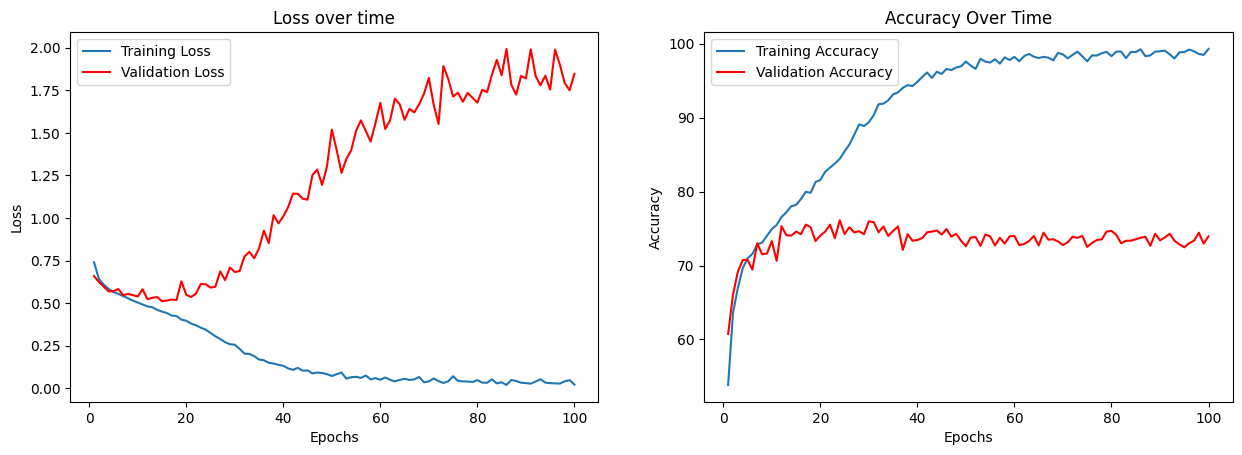

In [6]:
x_index = range(1, epochs+1, 1)

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figwidth(15)

ax1.plot(x_index, training_loss, label="Training Loss")
ax1.plot(x_index, val_loss, color='red', label="Validation Loss")
ax1.set_title("Loss over time")
ax1.legend()
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Loss")

ax2.plot(x_index, training_acc, label="Training Accuracy")
ax2.plot(x_index, val_acc, color='red', label="Validation Accuracy")
ax2.legend()
ax2.set_title("Accuracy Over Time")
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Accuracy")

print(np.min(training_loss), np.argmin(training_loss, axis=0))
print(np.max(training_acc), np.argmax(training_acc, axis=0))
print(np.min(val_loss), np.argmin(val_loss, axis=0), val_acc[np.argmin(val_loss, axis=0)])

### Summary:
The best loss for the validation model comes at Epoch 14, with a loss of 0.512, and an accuracy of 74.592%. Validation loss and training loss diverge over time, although validation accuracy remains roughly consistent, and training accuracy increases over time. This likely represents the model getting more confident about incorrect answers, but ultimately not getting less accurate.

In [7]:
# load the best train model for base
lenet_train_1 = LeNet()
lenet_train_1.load_state_dict(torch.load(best_model_train_path1))
lenet_train_1.to(device)

# load the best val model for base
lenet_val_1 = LeNet()
lenet_val_1.load_state_dict(torch.load(best_model_val_path1))
lenet_val_1.to(device)

success = 0
counter = 0
with torch.no_grad():
    for data in testloader:
        im, ground_truth = data

        # Move tensors to GPU for doing model testing
        im = im.to(device)
        ground_truth = ground_truth.to(device)
        
        op = lenet_train_1(im)        
        _, pred = torch.max(op.data, 1)
        counter += ground_truth.size(0)
        success += (pred == ground_truth).sum().item()

print(f'Best Training Model accuracy on {len(testloader.dataset)} images from test dataset: %5.3f %%' % (100 * success / counter))

success = 0
counter = 0
with torch.no_grad():
    for data in testloader:
        im, ground_truth = data

        # Move tensors to GPU for doing model testing
        im = im.to(device)
        ground_truth = ground_truth.to(device)
        
        op = lenet_val_1(im)        
        _, pred = torch.max(op.data, 1)
        counter += ground_truth.size(0)
        success += (pred == ground_truth).sum().item()

print(f'Best Validation Model accuracy on {len(testloader.dataset)} images from test dataset: %5.3f %%' % (100 * success / counter))

Best Training Model accuracy on 2023 images from test dataset: 73.752 %
Best Validation Model accuracy on 2023 images from test dataset: 74.592 %


In [8]:
class_success = list(0. for i in range(2))
class_counter = list(0. for i in range(2))

with torch.no_grad():
    for data in testloader:
        im, ground_truth = data

        # Move tensors to GPU for doing model testing
        im = im.to(device)
        
        op = lenet_train_1(im)
        _, pred = torch.max(op, 1)

        # Move tensors back to CPU
        pred = pred.cpu()
        im = im.cpu()
        ground_truth = ground_truth.cpu()
        
        c = (pred == ground_truth).squeeze()
        for i in range(2023):
            ground_truth_curr = ground_truth[i]
            class_success[ground_truth_curr] += c[i].item()
            class_counter[ground_truth_curr] += 1

for i in range(2):
    print('Train Model accuracy for class %5s : %5.3f %%' % (classes[i], 100 * class_success[i] / class_counter[i]))

class_success = list(0. for i in range(2))
class_counter = list(0. for i in range(2))

with torch.no_grad():
    for data in testloader:
        im, ground_truth = data

        # Move tensors to GPU for doing model testing
        im = im.to(device)
        
        op = lenet_val_1(im)
        _, pred = torch.max(op, 1)

        # Move tensors back to CPU
        pred = pred.cpu()
        im = im.cpu()
        ground_truth = ground_truth.cpu()
        
        c = (pred == ground_truth).squeeze()
        for i in range(2023):
            ground_truth_curr = ground_truth[i]
            class_success[ground_truth_curr] += c[i].item()
            class_counter[ground_truth_curr] += 1

for i in range(2):
    print('Validation Model accuracy for class %5s : %5.3f %%' % (classes[i], 100 * class_success[i] / class_counter[i]))

Train Model accuracy for class   cat : 78.042 %
Train Model accuracy for class   dog : 69.466 %
Validation Model accuracy for class   cat : 73.986 %
Validation Model accuracy for class   dog : 75.198 %


### Findings:

The validation model performs better on dog images than on cat images, although within 2% of each other. The training models much better on cats than on dogs.

Paraphrasing QI, cats are very much alike, but dogs are vastly different.

## Calculating the mean/standard deviation
The values previously used was the ImageNet mean and standard deviation. We will try to calculate our own mean/standard deviation for normalising our image dataset.

In [9]:
train_transform = transforms.Compose([transforms.Resize(size=(32,32), antialias=True),
                                      transforms.ToTensor()])

train_dataset = torchvision.datasets.ImageFolder(root="catdog/training_set", transform=train_transform)

trainloader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)

def batch_mean_and_sd(loader):    
    cnt = 0
    fst_moment = torch.empty(3)
    snd_moment = torch.empty(3)

    for images, _ in loader:
        b, c, h, w = images.shape
        nb_pixels = b * h * w
        sum_ = torch.sum(images, dim=[0, 2, 3])
        sum_of_square = torch.sum(images ** 2,
                                  dim=[0, 2, 3])
        fst_moment = (cnt * fst_moment + sum_) / (cnt + nb_pixels)
        snd_moment = (cnt * snd_moment + sum_of_square) / (cnt + nb_pixels)
        cnt += nb_pixels

    mean, std = fst_moment, torch.sqrt(snd_moment - fst_moment ** 2)        
    return mean,std

mean, std = batch_mean_and_sd(trainloader)
print("mean and std: \n", mean, std)

mean and std: 
 tensor([0.4882, 0.4551, 0.4174]) tensor([0.2441, 0.2371, 0.2398])


## Values Acquired:

mean: ([0.4882, 0.4551, 0.4174]) std_dev: ([0.2441, 0.2371, 0.2398])

This values will be used in the future for better normalisation, except where otherwise specified. It is hypothesised that normalisation may affect the results, but the small differences between the previous normalisation variables, and the derived newer ones, may not cause any significant difference.

## Training Part 2:

The same model is used, but with a different set of variables used for data normalisation.

In [10]:
train_transform = transforms.Compose([transforms.RandomHorizontalFlip(),
                                      transforms.Resize(size=(32,32), antialias=True),
                                      transforms.ToTensor(),
                                      transforms.Normalize((0.488, 0.455, 0.417), (0.244, 0.237, 0.240))])

train_dataset = torchvision.datasets.ImageFolder(root="catdog/training_set", transform=train_transform)

trainloader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)

test_transform = transforms.Compose([transforms.Resize(size=(32,32), antialias=True), transforms.ToTensor(), transforms.Normalize((0.488, 0.455, 0.417), (0.244, 0.237, 0.240))])

test_dataset = torchvision.datasets.ImageFolder(root="catdog/test_set", transform=test_transform)

testloader = torch.utils.data.DataLoader(test_dataset, batch_size=len(test_dataset), shuffle=False)

In [11]:
# paths to save the best model on training, and the best model on validation
best_model_train_path2 = './best_train_model_meancalculated.pth'
best_model_val_path2 = './best_val_model_meancalculated.pth'

In [12]:
lenet_modified = LeNet()
lenet_modified.to(device)
print(lenet_modified)

# define optimizer
optim = torch.optim.Adam(lenet_modified.parameters(), lr=0.001)

training_loss_mod1 = []
training_acc_mod1 = []
val_loss_mod1 = []
val_acc_mod1 = []
epochs = 100

best_train_loss = 0.0
best_val_loss = 0.0

# training loop over the dataset multiple times
for epoch in range(epochs):  
    t_loss, t_acc = train(lenet_modified, trainloader, optim, epoch)        
    training_loss_mod1.append(t_loss)
    training_acc_mod1.append(t_acc)
    
    v_loss, v_acc = test(lenet_modified, testloader)
    val_loss_mod1.append(v_loss)
    val_acc_mod1.append(v_acc)
    print()
    if best_train_loss > t_loss or best_train_loss <= 0:
        print("Better training loss, saving model.")
        best_train_loss = t_loss
        torch.save(lenet_modified.state_dict(), best_model_train_path2)
    if best_val_loss > v_loss or best_val_loss <= 0:
        print("Better validation loss, saving model.")
        best_val_loss = v_loss
        torch.save(lenet_modified.state_dict(), best_model_val_path2)

# Save model for future use
model_path = './base_model_meancalculated_100_epoch.pth'
torch.save(lenet_modified.state_dict(), model_path)

print('Finished Training')

LeNet(
  (cn1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (cn2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (maxpool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (flatten1): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)
[Epoch number : 1] accuracy: 54.791, loss: 0.736
LeNet accuracy on 2023 images from test dataset: 60.15818091942659. Loss: 0.6568858027458191

Better training loss, saving model.
Better validation loss, saving model.
[Epoch number : 2] accuracy: 64.635, loss: 0.628
LeNet accuracy on 2023 images from test dataset: 67.42461690558576. Loss: 0.613820493221283

Better training loss, saving model.
Better validation loss, saving model.
[Epoch number : 3] accuracy: 67.970

## Graph of Loss/Accuracy

0.01641136152486352 93
99.57526545908807 93
0.5190855860710144 12 74.5427582797825


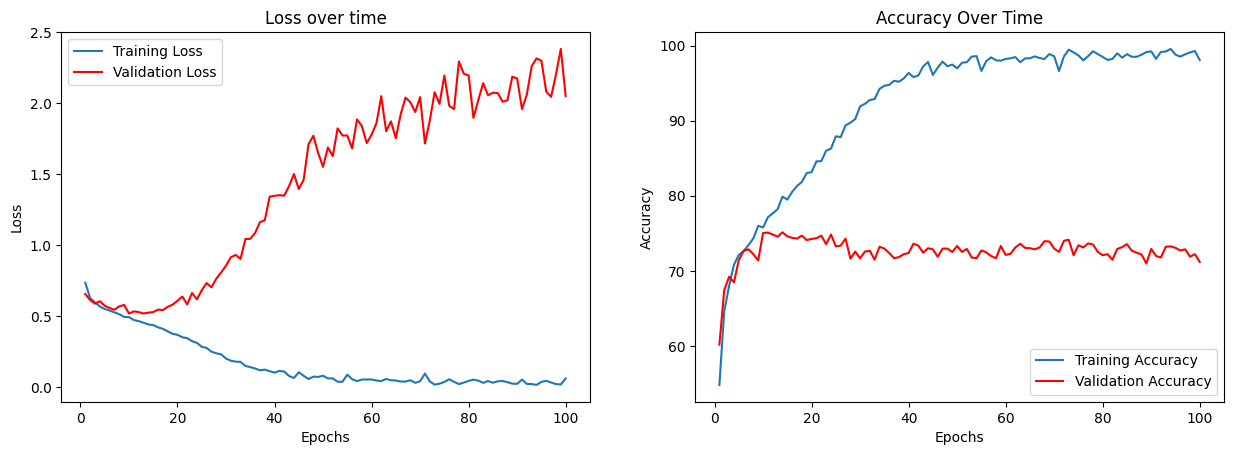

In [13]:
x_index = range(1, epochs+1, 1)

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figwidth(15)

ax1.plot(x_index, training_loss_mod1, label="Training Loss")
ax1.plot(x_index, val_loss_mod1, color='red', label="Validation Loss")
ax1.set_title("Loss over time")
ax1.legend()
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Loss")

ax2.plot(x_index, training_acc_mod1, label="Training Accuracy")
ax2.plot(x_index, val_acc_mod1, color='red', label="Validation Accuracy")
ax2.legend()
ax2.set_title("Accuracy Over Time")
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Accuracy")

print(np.min(training_loss_mod1), np.argmin(training_loss_mod1, axis=0))
print(np.max(training_acc_mod1), np.argmax(training_acc_mod1, axis=0))
print(np.min(val_loss_mod1), np.argmin(val_loss_mod1, axis=0), val_acc_mod1[np.argmin(val_loss_mod1, axis=0)])

## Loss/Accuracy Analysis

The best validation loss is 0.519, slightly worse than the previous dataset. This may be a run-to-run variance.

In [14]:
# load the best train model for base
lenet_train_2 = LeNet()
lenet_train_2.load_state_dict(torch.load(best_model_train_path2))
lenet_train_2.to(device)

# load the best val model for base
lenet_val_2 = LeNet()
lenet_val_2.load_state_dict(torch.load(best_model_val_path2))
lenet_val_2.to(device)

success = 0
counter = 0
with torch.no_grad():
    for data in testloader:
        im, ground_truth = data

        # Move tensors to GPU for doing model testing
        im = im.to(device)
        ground_truth = ground_truth.to(device)
        
        op = lenet_train_2(im)        
        _, pred = torch.max(op.data, 1)
        counter += ground_truth.size(0)
        success += (pred == ground_truth).sum().item()

print(f'Train Model accuracy on {len(testloader.dataset)} images from test dataset: %5.3f %%' % (100 * success / counter))

success = 0
counter = 0
with torch.no_grad():
    for data in testloader:
        im, ground_truth = data

        # Move tensors to GPU for doing model testing
        im = im.to(device)
        ground_truth = ground_truth.to(device)
        
        op = lenet_val_2(im)        
        _, pred = torch.max(op.data, 1)
        counter += ground_truth.size(0)
        success += (pred == ground_truth).sum().item()

print(f'Validation Model accuracy on {len(testloader.dataset)} images from test dataset: %5.3f %%' % (100 * success / counter))

Train Model accuracy on 2023 images from test dataset: 73.258 %
Validation Model accuracy on 2023 images from test dataset: 74.543 %


In [15]:
class_success = list(0. for i in range(2))
class_counter = list(0. for i in range(2))

with torch.no_grad():
    for data in testloader:
        im, ground_truth = data

        # Move tensors to GPU for doing model testing
        im = im.to(device)
        
        op = lenet_train_2(im)
        _, pred = torch.max(op, 1)

        # Move tensors back to CPU
        pred = pred.cpu()
        im = im.cpu()
        ground_truth = ground_truth.cpu()
        
        c = (pred == ground_truth).squeeze()
        for i in range(2023):
            ground_truth_curr = ground_truth[i]
            class_success[ground_truth_curr] += c[i].item()
            class_counter[ground_truth_curr] += 1

for i in range(2):
    print('Train Model accuracy for class %5s : %5.3f %%' % (classes[i], 100 * class_success[i] / class_counter[i]))

class_success = list(0. for i in range(2))
class_counter = list(0. for i in range(2))

with torch.no_grad():
    for data in testloader:
        im, ground_truth = data

        # Move tensors to GPU for doing model testing
        im = im.to(device)
        
        op = lenet_val_2(im)
        _, pred = torch.max(op, 1)

        # Move tensors back to CPU
        pred = pred.cpu()
        im = im.cpu()
        ground_truth = ground_truth.cpu()
        
        c = (pred == ground_truth).squeeze()
        for i in range(2023):
            ground_truth_curr = ground_truth[i]
            class_success[ground_truth_curr] += c[i].item()
            class_counter[ground_truth_curr] += 1

for i in range(2):
    print('Validation Model accuracy for class %5s : %5.3f %%' % (classes[i], 100 * class_success[i] / class_counter[i]))

Train Model accuracy for class   cat : 76.855 %
Train Model accuracy for class   dog : 69.664 %
Validation Model accuracy for class   cat : 74.876 %
Validation Model accuracy for class   dog : 74.209 %


### Train/Validation Per Class Accuracy

The train model still performs worse on dogs than cats, while the validation model performs similarly accurate.

## Training without data normalisation

It's hypothesised that the training the data on unnormalised images may perform worse than otherwise.

In [16]:
train_transform = transforms.Compose([transforms.RandomHorizontalFlip(),
                                      transforms.Resize(size=(32,32), antialias=True),
                                      transforms.ToTensor()])

train_dataset = torchvision.datasets.ImageFolder(root="catdog/training_set", transform=train_transform)

trainloader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)

test_transform = transforms.Compose([transforms.Resize(size=(32,32), antialias=True), transforms.ToTensor()])

test_dataset = torchvision.datasets.ImageFolder(root="catdog/test_set", transform=test_transform)

testloader = torch.utils.data.DataLoader(test_dataset, batch_size=len(test_dataset), shuffle=False)

classes = ('cat', 'dog')

In [17]:
# paths to save the best model on training, and the best model on validation
best_model_train_path3 = './best_train_model_nomean.pth'
best_model_val_path3 = './best_val_model_nomean.pth'

### Training Part 3

This model is trained with no data normalisation.

In [18]:
lenet_no_mean = LeNet()
lenet_no_mean.to(device)
print(lenet_no_mean)

# define optimizer
optim = torch.optim.Adam(lenet_no_mean.parameters(), lr=0.001)

training_loss_mod3 = []
training_acc_mod3 = []
val_loss_mod3 = []
val_acc_mod3 = []
epochs = 100

best_train_loss = 0.0
best_val_loss = 0.0

# training loop over the dataset multiple times
for epoch in range(epochs):  
    t_loss, t_acc = train(lenet_no_mean, trainloader, optim, epoch)        
    training_loss_mod3.append(t_loss)
    training_acc_mod3.append(t_acc)
    
    v_loss, v_acc = test(lenet_no_mean, testloader)
    val_loss_mod3.append(v_loss)
    val_acc_mod3.append(v_acc)
    print()
    if best_train_loss > t_loss or best_train_loss <= 0:
        print("Better training loss, saving model.")
        best_train_loss = t_loss
        torch.save(lenet_no_mean.state_dict(), best_model_train_path3)
    if best_val_loss > v_loss or best_val_loss <= 0:
        print("Better validation loss, saving model.")
        best_val_loss = v_loss
        torch.save(lenet_no_mean.state_dict(), best_model_val_path3)

# Save model for future use
model_path = './base_model_nomean_100_epoch.pth'
torch.save(lenet_no_mean.state_dict(), model_path)

print('Finished Training')

LeNet(
  (cn1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (cn2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (maxpool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (flatten1): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)
[Epoch number : 1] accuracy: 50.831, loss: 0.756
LeNet accuracy on 2023 images from test dataset: 50.37073652990608. Loss: 0.6944466233253479

Better training loss, saving model.
Better validation loss, saving model.
[Epoch number : 2] accuracy: 51.518, loss: 0.697
LeNet accuracy on 2023 images from test dataset: 49.28324270884824. Loss: 0.6912506818771362

Better training loss, saving model.
Better validation loss, saving model.
[Epoch number : 3] accuracy: 53.57

### Graph of Loss/Accuracy over time

0.032141605433145266 93
98.9256714553404 97
0.5308054089546204 16 74.59218981710332


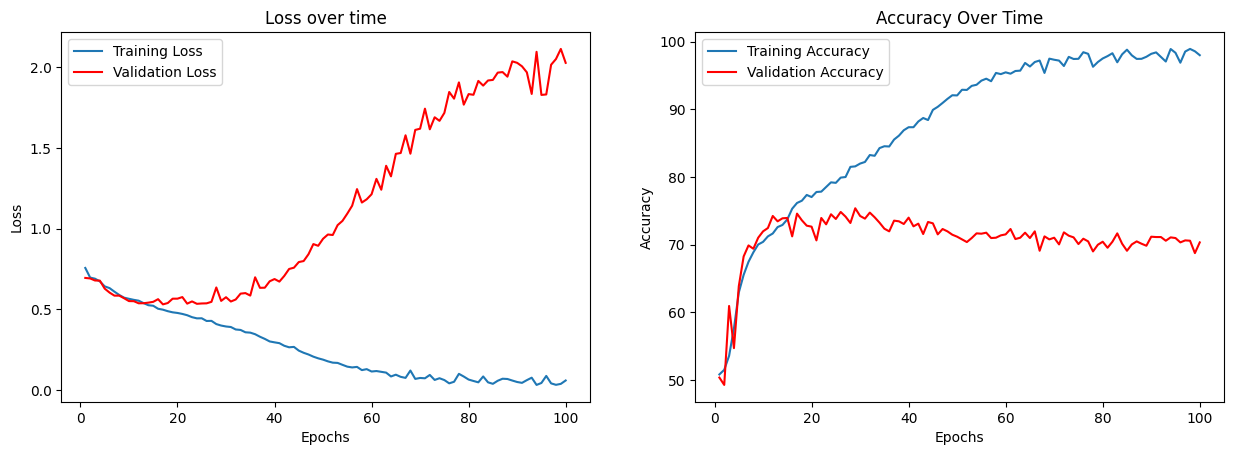

In [19]:
x_index = range(1, epochs+1, 1)

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figwidth(15)

ax1.plot(x_index, training_loss_mod3, label="Training Loss")
ax1.plot(x_index, val_loss_mod3, color='red', label="Validation Loss")
ax1.set_title("Loss over time")
ax1.legend()
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Loss")

ax2.plot(x_index, training_acc_mod3, label="Training Accuracy")
ax2.plot(x_index, val_acc_mod3, color='red', label="Validation Accuracy")
ax2.legend()
ax2.set_title("Accuracy Over Time")
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Accuracy")

print(np.min(training_loss_mod3), np.argmin(training_loss_mod3, axis=0))
print(np.max(training_acc_mod3), np.argmax(training_acc_mod3, axis=0))
print(np.min(val_loss_mod3), np.argmin(val_loss_mod3, axis=0), val_acc_mod3[np.argmin(val_loss_mod3, axis=0)])

### Loss/Accuracy Analysis

The best loss is 0.531, worse than both the base model, and the model with modified normalisation variables. Even the training accuracy maximum is below 99%. This shows how important data normalisation in making neural network models perform.

In [20]:
# load the best train model for base
lenet_train_3 = LeNet()
lenet_train_3.load_state_dict(torch.load(best_model_train_path3))
lenet_train_3.to(device)

# load the best val model for base
lenet_val_3 = LeNet()
lenet_val_3.load_state_dict(torch.load(best_model_val_path3))
lenet_val_3.to(device)

success = 0
counter = 0
with torch.no_grad():
    for data in testloader:
        im, ground_truth = data

        # Move tensors to GPU for doing model testing
        im = im.to(device)
        ground_truth = ground_truth.to(device)
        
        op = lenet_train_3(im)        
        _, pred = torch.max(op.data, 1)
        counter += ground_truth.size(0)
        success += (pred == ground_truth).sum().item()

print(f'Train Model accuracy on {len(testloader.dataset)} images from test dataset: %5.3f %%' % (100 * success / counter))

success = 0
counter = 0
with torch.no_grad():
    for data in testloader:
        im, ground_truth = data

        # Move tensors to GPU for doing model testing
        im = im.to(device)
        ground_truth = ground_truth.to(device)
        
        op = lenet_val_3(im)        
        _, pred = torch.max(op.data, 1)
        counter += ground_truth.size(0)
        success += (pred == ground_truth).sum().item()

print(f'Validation Model accuracy on {len(testloader.dataset)} images from test dataset: %5.3f %%' % (100 * success / counter))

Train Model accuracy on 2023 images from test dataset: 71.083 %
Validation Model accuracy on 2023 images from test dataset: 74.592 %


In [21]:
class_success = list(0. for i in range(2))
class_counter = list(0. for i in range(2))

with torch.no_grad():
    for data in testloader:
        im, ground_truth = data

        # Move tensors to GPU for doing model testing
        im = im.to(device)
        
        op = lenet_train_3(im)
        _, pred = torch.max(op, 1)

        # Move tensors back to CPU
        pred = pred.cpu()
        im = im.cpu()
        ground_truth = ground_truth.cpu()
        
        c = (pred == ground_truth).squeeze()
        for i in range(2023):
            ground_truth_curr = ground_truth[i]
            class_success[ground_truth_curr] += c[i].item()
            class_counter[ground_truth_curr] += 1

for i in range(2):
    print('Train Model accuracy for class %5s : %5.3f %%' % (classes[i], 100 * class_success[i] / class_counter[i]))

class_success = list(0. for i in range(2))
class_counter = list(0. for i in range(2))

with torch.no_grad():
    for data in testloader:
        im, ground_truth = data

        # Move tensors to GPU for doing model testing
        im = im.to(device)
        
        op = lenet_val_3(im)
        _, pred = torch.max(op, 1)

        # Move tensors back to CPU
        pred = pred.cpu()
        im = im.cpu()
        ground_truth = ground_truth.cpu()
        
        c = (pred == ground_truth).squeeze()
        for i in range(2023):
            ground_truth_curr = ground_truth[i]
            class_success[ground_truth_curr] += c[i].item()
            class_counter[ground_truth_curr] += 1

for i in range(2):
    print('Validation Model accuracy for class %5s : %5.3f %%' % (classes[i], 100 * class_success[i] / class_counter[i]))

Train Model accuracy for class   cat : 68.348 %
Train Model accuracy for class   dog : 73.814 %
Validation Model accuracy for class   cat : 77.448 %
Validation Model accuracy for class   dog : 71.739 %


### Per Class Accuracy

The best validation model performs much better on cats than dogs, while the best training model performs better on dogs than cats.

## Dropout

Dropout zeroes out a percentage of the neurons in a neural network layer randomly. The rationale for doing so is that this efficiently simulates training multiple neural network models and averaging out the output of said models. This helps the neural network model rely on 'strong' patterns that are presumed to be both in the training dataset and the validation datasets, and ignore 'weak' patterns that only appear in the training dataset.

### Trained Models, Part 4

We create 3 models. 1 has a dropout layer of 0.2 after the first convolutional layer, 2 has a dropout layer of 0.2 after the flatten layer, and 3 has both dropout layers from the 1st and 2nd model. It's hypothesised that 1 of the 3 models will perform better than the others.

In [22]:
class LeNet_dropout_1(nn.Module):

    def __init__(self):
        super(LeNet_dropout_1, self).__init__()
        # 3 input image channel, 6 output feature maps and 5x5 conv kernel
        self.cn1 = nn.Conv2d(3, 6, 5) # (32-5+0)/1 + 1 => 28 * 28 * 6
        self.maxpool1 = nn.MaxPool2d(2)
        self.dropout1 = nn.Dropout(0.2)
        # After pooling, 28/2 => 14 * 14 * 6
        # 6 input image channel, 16 output feature maps and 5x5 conv kernel
        self.cn2 = nn.Conv2d(6, 16, 5) # (14-5+0)/1 + 1 = 10 * 10 * 16
        self.maxpool2 = nn.MaxPool2d(2)
        # fully connected layers of size 120, 84 and 10
        # After pooling, 10/2 => 5 * 5 * 16
        self.flatten1 = nn.Flatten()
        self.fc1 = nn.Linear(16 * 5 * 5, 120)  # 5*5 is the spatial dimension at this layer
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Convolution with 5x5 kernel
        x = F.relu(self.cn1(x))
        # Max pooling over a (2, 2) window        
        x = self.maxpool1(x)
        x = self.dropout1(x)
        # Convolution with 5x5 kernel
        x = F.relu(self.cn2(x))
        # Max pooling over a (2, 2) window        
        x = self.maxpool2(x)
        # Flatten spatial and depth dimensions into a single vector        
        x = self.flatten1(x)
        # Fully connected operations
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def flattened_features(self, x):
        # all except the first (batch) dimension
        size = x.size()[1:]  
        num_feats = 1
        for s in size:
            num_feats *= s
        return num_feats

lenet_d1 = LeNet_dropout_1()
lenet_d1.to(device)

LeNet_dropout_1(
  (cn1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout1): Dropout(p=0.2, inplace=False)
  (cn2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (maxpool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (flatten1): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [23]:
class LeNet_dropout_2(nn.Module):

    def __init__(self):
        super(LeNet_dropout_2, self).__init__()
        # 3 input image channel, 6 output feature maps and 5x5 conv kernel
        self.cn1 = nn.Conv2d(3, 6, 5) # (32-5+0)/1 + 1 => 28 * 28 * 6
        self.maxpool1 = nn.MaxPool2d(2)        
        # After pooling, 28/2 => 14 * 14 * 6
        # 6 input image channel, 16 output feature maps and 5x5 conv kernel
        self.cn2 = nn.Conv2d(6, 16, 5) # (14-5+0)/1 + 1 = 10 * 10 * 16
        self.maxpool2 = nn.MaxPool2d(2)
        # fully connected layers of size 120, 84 and 10
        # After pooling, 10/2 => 5 * 5 * 16
        self.flatten1 = nn.Flatten()
        self.dropout2 = nn.Dropout(0.2)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)  # 5*5 is the spatial dimension at this layer
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Convolution with 5x5 kernel
        x = F.relu(self.cn1(x))
        # Max pooling over a (2, 2) window        
        x = self.maxpool1(x)        
        # Convolution with 5x5 kernel
        x = F.relu(self.cn2(x))
        # Max pooling over a (2, 2) window        
        x = self.maxpool2(x)
        # Flatten spatial and depth dimensions into a single vector        
        x = self.flatten1(x)
        x = self.dropout2(x)
        # Fully connected operations
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def flattened_features(self, x):
        # all except the first (batch) dimension
        size = x.size()[1:]  
        num_feats = 1
        for s in size:
            num_feats *= s
        return num_feats

lenet_d2 = LeNet_dropout_2()
lenet_d2.to(device)

LeNet_dropout_2(
  (cn1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (cn2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (maxpool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (flatten1): Flatten(start_dim=1, end_dim=-1)
  (dropout2): Dropout(p=0.2, inplace=False)
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [24]:
class LeNet_dropout_3(nn.Module):

    def __init__(self):
        super(LeNet_dropout_3, self).__init__()
        # 3 input image channel, 6 output feature maps and 5x5 conv kernel
        self.cn1 = nn.Conv2d(3, 6, 5) # (32-5+0)/1 + 1 => 28 * 28 * 6
        self.maxpool1 = nn.MaxPool2d(2)        
        self.dropout1 = nn.Dropout(0.2)
        # After pooling, 28/2 => 14 * 14 * 6
        # 6 input image channel, 16 output feature maps and 5x5 conv kernel
        self.cn2 = nn.Conv2d(6, 16, 5) # (14-5+0)/1 + 1 = 10 * 10 * 16
        self.maxpool2 = nn.MaxPool2d(2)
        # fully connected layers of size 120, 84 and 10
        # After pooling, 10/2 => 5 * 5 * 16
        self.flatten1 = nn.Flatten()
        self.dropout2 = nn.Dropout(0.2)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)  # 5*5 is the spatial dimension at this layer
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Convolution with 5x5 kernel
        x = F.relu(self.cn1(x))
        # Max pooling over a (2, 2) window        
        x = self.maxpool1(x)        
        x = self.dropout1(x)
        # Convolution with 5x5 kernel
        x = F.relu(self.cn2(x))
        # Max pooling over a (2, 2) window        
        x = self.maxpool2(x)
        # Flatten spatial and depth dimensions into a single vector        
        x = self.flatten1(x)
        x = self.dropout2(x)
        # Fully connected operations
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def flattened_features(self, x):
        # all except the first (batch) dimension
        size = x.size()[1:]  
        num_feats = 1
        for s in size:
            num_feats *= s
        return num_feats

lenet_d3 = LeNet_dropout_3()
lenet_d3.to(device)

LeNet_dropout_3(
  (cn1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout1): Dropout(p=0.2, inplace=False)
  (cn2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (maxpool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (flatten1): Flatten(start_dim=1, end_dim=-1)
  (dropout2): Dropout(p=0.2, inplace=False)
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [25]:
train_transform = transforms.Compose([transforms.RandomHorizontalFlip(),
                                      transforms.Resize(size=(32,32), antialias=True),
                                      transforms.ToTensor(),
                                      transforms.Normalize((0.488, 0.455, 0.417), (0.244, 0.237, 0.240))])

train_dataset = torchvision.datasets.ImageFolder(root="catdog/training_set", transform=train_transform)

trainloader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)

test_transform = transforms.Compose([transforms.Resize(size=(32,32), antialias=True), transforms.ToTensor(), transforms.Normalize((0.488, 0.455, 0.417), (0.244, 0.237, 0.240))])

test_dataset = torchvision.datasets.ImageFolder(root="catdog/test_set", transform=test_transform)

testloader = torch.utils.data.DataLoader(test_dataset, batch_size=len(test_dataset), shuffle=False)

In [26]:
# paths to save the best model on training, and the best model on validation
best_model_train_path_d1 = './best_train_model_d1.pth'
best_model_val_path_d1 = './best_val_model_d1.pth'

best_model_train_path_d2 = './best_train_model_d2.pth'
best_model_val_path_d2 = './best_val_model_d2.pth'

best_model_train_path_d3 = './best_train_model_d3.pth'
best_model_val_path_d3 = './best_val_model_d3.pth'

In [27]:
# define optimizer
optim = torch.optim.Adam(lenet_d1.parameters(), lr=0.001)

training_loss_d1 = []
training_acc_d1 = []
val_loss_d1 = []
val_acc_d1 = []
epochs = 100

best_train_loss = 0.0
best_val_loss = 0.0

# training loop over the dataset multiple times
for epoch in range(epochs):  
    t_loss, t_acc = train(lenet_d1, trainloader, optim, epoch)        
    training_loss_d1.append(t_loss)
    training_acc_d1.append(t_acc)
    
    v_loss, v_acc = test(lenet_d1, testloader)
    val_loss_d1.append(v_loss)
    val_acc_d1.append(v_acc)
    print()
    if best_train_loss > t_loss or best_train_loss <= 0:
        print("Better training loss, saving model.")
        best_train_loss = t_loss
        torch.save(lenet_d1.state_dict(), best_model_train_path_d1)
    if best_val_loss > v_loss or best_val_loss <= 0:
        print("Better validation loss, saving model.")
        best_val_loss = v_loss
        torch.save(lenet_d1.state_dict(), best_model_val_path_d1)

# Save model for future use
model_path = './base_model_d1_100_epoch.pth'
torch.save(lenet_d1.state_dict(), model_path)

print('Finished Training')

[Epoch number : 1] accuracy: 53.329, loss: 0.737
LeNet accuracy on 2023 images from test dataset: 64.16213544241226. Loss: 0.6468834280967712

Better training loss, saving model.
Better validation loss, saving model.
[Epoch number : 2] accuracy: 62.873, loss: 0.643
LeNet accuracy on 2023 images from test dataset: 66.63371230845279. Loss: 0.6147825717926025

Better training loss, saving model.
Better validation loss, saving model.
[Epoch number : 3] accuracy: 65.572, loss: 0.623
LeNet accuracy on 2023 images from test dataset: 68.11665842807712. Loss: 0.6210513114929199

Better training loss, saving model.
[Epoch number : 4] accuracy: 67.245, loss: 0.610
LeNet accuracy on 2023 images from test dataset: 67.82006920415225. Loss: 0.6025409698486328

Better training loss, saving model.
Better validation loss, saving model.
[Epoch number : 5] accuracy: 67.908, loss: 0.592
LeNet accuracy on 2023 images from test dataset: 66.2382600098863. Loss: 0.6121036410331726

Better training loss, saving

In [28]:
# define optimizer
optim = torch.optim.Adam(lenet_d2.parameters(), lr=0.001)

training_loss_d2 = []
training_acc_d2 = []
val_loss_d2 = []
val_acc_d2 = []
epochs = 100

best_train_loss = 0.0
best_val_loss = 0.0

# training loop over the dataset multiple times
for epoch in range(epochs):  
    t_loss, t_acc = train(lenet_d2, trainloader, optim, epoch)        
    training_loss_d2.append(t_loss)
    training_acc_d2.append(t_acc)
    print() # Newline
    v_loss, v_acc = test(lenet_d2, testloader)
    val_loss_d2.append(v_loss)
    val_acc_d2.append(v_acc)
    print()
    if best_train_loss > t_loss or best_train_loss <= 0:
        print("Better training loss, saving model.")
        best_train_loss = t_loss
        torch.save(lenet_d2.state_dict(), best_model_train_path_d2)
    if best_val_loss > v_loss or best_val_loss <= 0:
        print("Better validation loss, saving model.")
        best_val_loss = v_loss
        torch.save(lenet_d2.state_dict(), best_model_val_path_d2)

# Save model for future use
model_path = './base_model_d2_100_epoch.pth'
torch.save(lenet_d2.state_dict(), model_path)

print('Finished Training')

[Epoch number : 1] accuracy: 52.542, loss: 0.749

LeNet accuracy on 2023 images from test dataset: 58.774097874443896. Loss: 0.6721910238265991

Better training loss, saving model.
Better validation loss, saving model.
[Epoch number : 2] accuracy: 61.324, loss: 0.656

LeNet accuracy on 2023 images from test dataset: 60.94908551655956. Loss: 0.6548137068748474

Better training loss, saving model.
Better validation loss, saving model.
[Epoch number : 3] accuracy: 65.384, loss: 0.623

LeNet accuracy on 2023 images from test dataset: 68.21552150271873. Loss: 0.602047324180603

Better training loss, saving model.
Better validation loss, saving model.
[Epoch number : 4] accuracy: 67.583, loss: 0.604

LeNet accuracy on 2023 images from test dataset: 67.22689075630252. Loss: 0.5989350080490112

Better training loss, saving model.
Better validation loss, saving model.
[Epoch number : 5] accuracy: 69.244, loss: 0.583

LeNet accuracy on 2023 images from test dataset: 69.84676223430549. Loss: 0.58

In [29]:
# define optimizer
optim = torch.optim.Adam(lenet_d3.parameters(), lr=0.001)

training_loss_d3 = []
training_acc_d3 = []
val_loss_d3 = []
val_acc_d3 = []
epochs = 100

best_train_loss = 0.0
best_val_loss = 0.0

# training loop over the dataset multiple times
for epoch in range(epochs):  
    t_loss, t_acc = train(lenet_d3, trainloader, optim, epoch)        
    training_loss_d3.append(t_loss)
    training_acc_d3.append(t_acc)
    
    v_loss, v_acc = test(lenet_d3, testloader)
    val_loss_d3.append(v_loss)
    val_acc_d3.append(v_acc)
    print()
    if best_train_loss > t_loss or best_train_loss <= 0:
        print("Better training loss, saving model.")
        best_train_loss = t_loss
        torch.save(lenet_d3.state_dict(), best_model_train_path_d3)
    if best_val_loss > v_loss or best_val_loss <= 0:
        print("Better validation loss, saving model.")
        best_val_loss = v_loss
        torch.save(lenet_d3.state_dict(), best_model_val_path_d3)

# Save model for future use
model_path = './base_model_d3_100_epoch.pth'
torch.save(lenet_d3.state_dict(), model_path)

print('Finished Training')

[Epoch number : 1] accuracy: 53.242, loss: 0.740
LeNet accuracy on 2023 images from test dataset: 63.9149777558082. Loss: 0.6530992388725281

Better training loss, saving model.
Better validation loss, saving model.
[Epoch number : 2] accuracy: 61.874, loss: 0.653
LeNet accuracy on 2023 images from test dataset: 66.78200692041523. Loss: 0.6317945718765259

Better training loss, saving model.
Better validation loss, saving model.
[Epoch number : 3] accuracy: 64.822, loss: 0.629
LeNet accuracy on 2023 images from test dataset: 66.58428077113199. Loss: 0.6140745282173157

Better training loss, saving model.
Better validation loss, saving model.
[Epoch number : 4] accuracy: 66.846, loss: 0.609
LeNet accuracy on 2023 images from test dataset: 68.66040533860603. Loss: 0.6052682399749756

Better training loss, saving model.
Better validation loss, saving model.
[Epoch number : 5] accuracy: 68.132, loss: 0.597
LeNet accuracy on 2023 images from test dataset: 69.05585763717252. Loss: 0.58871287

### 3 Graphs For Loss/Accuracy

0.14596479541930069 96
94.19113054341037 96
0.5306288599967957 15 72.56549678695008
0.13563054149035378 95
95.0156152404747 95
0.5335046648979187 19 74.14730598121602
0.27446655181062174 98
88.28232354778264 98
0.5314775705337524 24 74.14730598121602


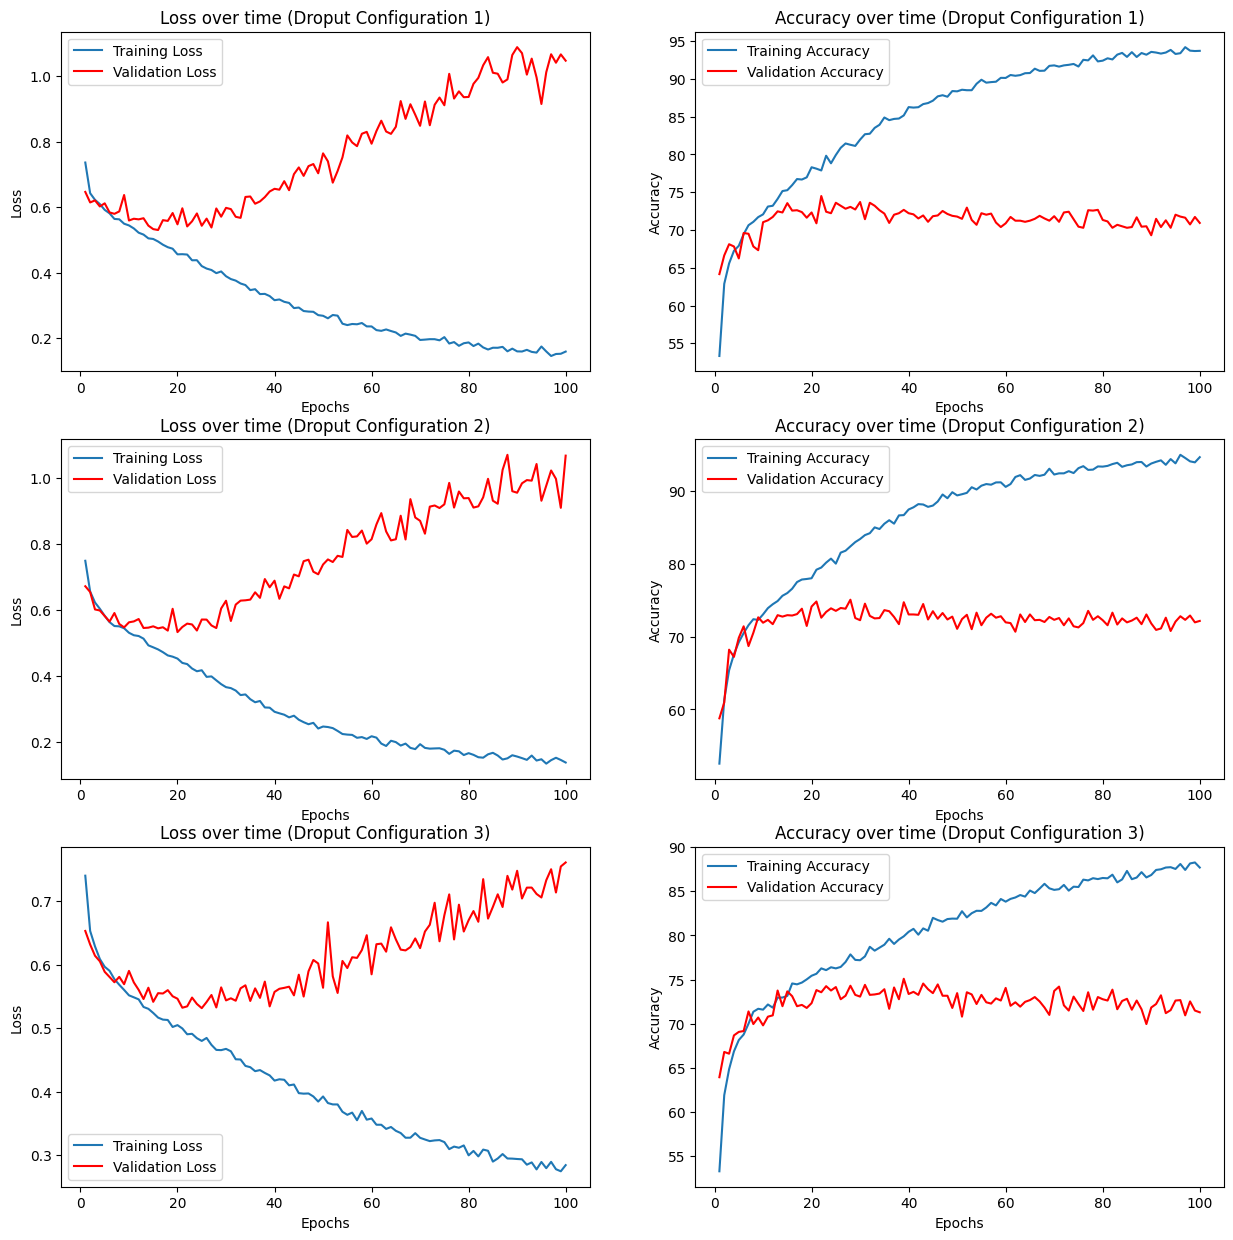

In [30]:
x_index = range(1, epochs+1, 1)

fig, axs = plt.subplots(3, 2)
fig.set_figwidth(15)
fig.set_figheight(15)

axs[0,0].plot(x_index, training_loss_d1, label="Training Loss")
axs[0,0].plot(x_index, val_loss_d1, color='red', label="Validation Loss")
axs[0,0].set_title("Loss over time (Droput Configuration 1)")
axs[0,0].legend()
axs[0,0].set_xlabel("Epochs")
axs[0,0].set_ylabel("Loss")

axs[0,1].plot(x_index, training_acc_d1, label="Training Accuracy")
axs[0,1].plot(x_index, val_acc_d1, color='red', label="Validation Accuracy")
axs[0,1].set_title("Accuracy over time (Droput Configuration 1)")
axs[0,1].legend()
axs[0,1].set_xlabel("Epochs")
axs[0,1].set_ylabel("Accuracy")

axs[1,0].plot(x_index, training_loss_d2, label="Training Loss")
axs[1,0].plot(x_index, val_loss_d2, color='red', label="Validation Loss")
axs[1,0].set_title("Loss over time (Droput Configuration 2)")
axs[1,0].legend()
axs[1,0].set_xlabel("Epochs")
axs[1,0].set_ylabel("Loss")

axs[1,1].plot(x_index, training_acc_d2, label="Training Accuracy")
axs[1,1].plot(x_index, val_acc_d2, color='red', label="Validation Accuracy")
axs[1,1].set_title("Accuracy over time (Droput Configuration 2)")
axs[1,1].legend()
axs[1,1].set_xlabel("Epochs")
axs[1,1].set_ylabel("Accuracy")

axs[2,0].plot(x_index, training_loss_d3, label="Training Loss")
axs[2,0].plot(x_index, val_loss_d3, color='red', label="Validation Loss")
axs[2,0].set_title("Loss over time (Droput Configuration 3)")
axs[2,0].legend()
axs[2,0].set_xlabel("Epochs")
axs[2,0].set_ylabel("Loss")

axs[2,1].plot(x_index, training_acc_d3, label="Training Accuracy")
axs[2,1].plot(x_index, val_acc_d3, color='red', label="Validation Accuracy")
axs[2,1].set_title("Accuracy over time (Droput Configuration 3)")
axs[2,1].legend()
axs[2,1].set_xlabel("Epochs")
axs[2,1].set_ylabel("Accuracy")

print(np.min(training_loss_d1), np.argmin(training_loss_d1, axis=0))
print(np.max(training_acc_d1), np.argmax(training_acc_d1, axis=0))
print(np.min(val_loss_d1), np.argmin(val_loss_d1, axis=0), val_acc_d1[np.argmin(val_loss_d1, axis=0)])

print(np.min(training_loss_d2), np.argmin(training_loss_d2, axis=0))
print(np.max(training_acc_d2), np.argmax(training_acc_d2, axis=0))
print(np.min(val_loss_d2), np.argmin(val_loss_d2, axis=0), val_acc_d2[np.argmin(val_loss_d2, axis=0)])

print(np.min(training_loss_d3), np.argmin(training_loss_d3, axis=0))
print(np.max(training_acc_d3), np.argmax(training_acc_d3, axis=0))
print(np.min(val_loss_d3), np.argmin(val_loss_d3, axis=0), val_acc_d3[np.argmin(val_loss_d3, axis=0)])

## Analysis

The 3rd model has the least amount of divergence of validation loss from training loss over time, although the first model has the best loss of 0.5306. The 3rd model has the best accuracy of 74.147%. The loss is worse than the original baseline model, but this may be just run-to-run variance.

In [31]:
# load the best train model
lenet_train_d1 = LeNet()
lenet_train_d1.load_state_dict(torch.load(best_model_train_path_d1))
lenet_train_d1.to(device)

lenet_train_d2 = LeNet()
lenet_train_d2.load_state_dict(torch.load(best_model_train_path_d2))
lenet_train_d2.to(device)

lenet_train_d3 = LeNet()
lenet_train_d3.load_state_dict(torch.load(best_model_train_path_d3))
lenet_train_d3.to(device)

# load the best val model for base
lenet_val_d1 = LeNet()
lenet_val_d1.load_state_dict(torch.load(best_model_val_path_d1))
lenet_val_d1.to(device)

lenet_val_d2 = LeNet()
lenet_val_d2.load_state_dict(torch.load(best_model_val_path_d2))
lenet_val_d2.to(device)

lenet_val_d3 = LeNet()
lenet_val_d3.load_state_dict(torch.load(best_model_val_path_d3))
lenet_val_d3.to(device)

success = 0
counter = 0
with torch.no_grad():
    for data in testloader:
        im, ground_truth = data

        # Move tensors to GPU for doing model testing
        im = im.to(device)
        ground_truth = ground_truth.to(device)
        
        op = lenet_train_d1(im)        
        _, pred = torch.max(op.data, 1)
        counter += ground_truth.size(0)
        success += (pred == ground_truth).sum().item()

print(f'Train Model accuracy on {len(testloader.dataset)} images from test dataset: %5.3f %%' % (100 * success / counter))

success = 0
counter = 0
with torch.no_grad():
    for data in testloader:
        im, ground_truth = data

        # Move tensors to GPU for doing model testing
        im = im.to(device)
        ground_truth = ground_truth.to(device)
        
        op = lenet_val_d1(im)        
        _, pred = torch.max(op.data, 1)
        counter += ground_truth.size(0)
        success += (pred == ground_truth).sum().item()

print(f'Validation Model accuracy on {len(testloader.dataset)} images from test dataset: %5.3f %%' % (100 * success / counter))

success = 0
counter = 0
with torch.no_grad():
    for data in testloader:
        im, ground_truth = data

        # Move tensors to GPU for doing model testing
        im = im.to(device)
        ground_truth = ground_truth.to(device)
        
        op = lenet_train_d2(im)        
        _, pred = torch.max(op.data, 1)
        counter += ground_truth.size(0)
        success += (pred == ground_truth).sum().item()

print(f'Train Model accuracy on {len(testloader.dataset)} images from test dataset: %5.3f %%' % (100 * success / counter))

success = 0
counter = 0
with torch.no_grad():
    for data in testloader:
        im, ground_truth = data

        # Move tensors to GPU for doing model testing
        im = im.to(device)
        ground_truth = ground_truth.to(device)
        
        op = lenet_val_d2(im)        
        _, pred = torch.max(op.data, 1)
        counter += ground_truth.size(0)
        success += (pred == ground_truth).sum().item()

print(f'Validation Model accuracy on {len(testloader.dataset)} images from test dataset: %5.3f %%' % (100 * success / counter))

success = 0
counter = 0
with torch.no_grad():
    for data in testloader:
        im, ground_truth = data

        # Move tensors to GPU for doing model testing
        im = im.to(device)
        ground_truth = ground_truth.to(device)
        
        op = lenet_train_d3(im)        
        _, pred = torch.max(op.data, 1)
        counter += ground_truth.size(0)
        success += (pred == ground_truth).sum().item()

print(f'Train Model accuracy on {len(testloader.dataset)} images from test dataset: %5.3f %%' % (100 * success / counter))

success = 0
counter = 0
with torch.no_grad():
    for data in testloader:
        im, ground_truth = data

        # Move tensors to GPU for doing model testing
        im = im.to(device)
        ground_truth = ground_truth.to(device)
        
        op = lenet_val_d3(im)        
        _, pred = torch.max(op.data, 1)
        counter += ground_truth.size(0)
        success += (pred == ground_truth).sum().item()

print(f'Validation Model accuracy on {len(testloader.dataset)} images from test dataset: %5.3f %%' % (100 * success / counter))

Train Model accuracy on 2023 images from test dataset: 71.725 %
Validation Model accuracy on 2023 images from test dataset: 73.554 %
Train Model accuracy on 2023 images from test dataset: 75.334 %
Validation Model accuracy on 2023 images from test dataset: 74.691 %
Train Model accuracy on 2023 images from test dataset: 73.900 %
Validation Model accuracy on 2023 images from test dataset: 74.938 %


In [34]:
classes = ['cat', 'dog']

class_success = list(0. for i in range(2))
class_counter = list(0. for i in range(2))

with torch.no_grad():
    for data in testloader:
        im, ground_truth = data

        # Move tensors to GPU for doing model testing
        im = im.to(device)
        
        op = lenet_train_d1(im)
        _, pred = torch.max(op, 1)

        # Move tensors back to CPU
        pred = pred.cpu()
        im = im.cpu()
        ground_truth = ground_truth.cpu()
        
        c = (pred == ground_truth).squeeze()
        for i in range(2023):
            ground_truth_curr = ground_truth[i]
            class_success[ground_truth_curr] += c[i].item()
            class_counter[ground_truth_curr] += 1

for i in range(2):
    print('Train Model accuracy for class %5s : %5.3f %%' % (classes[i], 100 * class_success[i] / class_counter[i]))

class_success = list(0. for i in range(2))
class_counter = list(0. for i in range(2))

with torch.no_grad():
    for data in testloader:
        im, ground_truth = data

        # Move tensors to GPU for doing model testing
        im = im.to(device)
        
        op = lenet_val_d1(im)
        _, pred = torch.max(op, 1)

        # Move tensors back to CPU
        pred = pred.cpu()
        im = im.cpu()
        ground_truth = ground_truth.cpu()
        
        c = (pred == ground_truth).squeeze()
        for i in range(2023):
            ground_truth_curr = ground_truth[i]
            class_success[ground_truth_curr] += c[i].item()
            class_counter[ground_truth_curr] += 1

for i in range(2):
    print('Validation Model accuracy for class %5s : %5.3f %%' % (classes[i], 100 * class_success[i] / class_counter[i]))

print()

class_success = list(0. for i in range(2))
class_counter = list(0. for i in range(2))

with torch.no_grad():
    for data in testloader:
        im, ground_truth = data

        # Move tensors to GPU for doing model testing
        im = im.to(device)
        
        op = lenet_train_d2(im)
        _, pred = torch.max(op, 1)

        # Move tensors back to CPU
        pred = pred.cpu()
        im = im.cpu()
        ground_truth = ground_truth.cpu()
        
        c = (pred == ground_truth).squeeze()
        for i in range(2023):
            ground_truth_curr = ground_truth[i]
            class_success[ground_truth_curr] += c[i].item()
            class_counter[ground_truth_curr] += 1

for i in range(2):
    print('Train Model accuracy for class %5s : %5.3f %%' % (classes[i], 100 * class_success[i] / class_counter[i]))

class_success = list(0. for i in range(2))
class_counter = list(0. for i in range(2))

with torch.no_grad():
    for data in testloader:
        im, ground_truth = data

        # Move tensors to GPU for doing model testing
        im = im.to(device)
        
        op = lenet_val_d2(im)
        _, pred = torch.max(op, 1)

        # Move tensors back to CPU
        pred = pred.cpu()
        im = im.cpu()
        ground_truth = ground_truth.cpu()
        
        c = (pred == ground_truth).squeeze()
        for i in range(2023):
            ground_truth_curr = ground_truth[i]
            class_success[ground_truth_curr] += c[i].item()
            class_counter[ground_truth_curr] += 1

for i in range(2):
    print('Validation Model accuracy for class %5s : %5.3f %%' % (classes[i], 100 * class_success[i] / class_counter[i]))

print()

class_success = list(0. for i in range(2))
class_counter = list(0. for i in range(2))

with torch.no_grad():
    for data in testloader:
        im, ground_truth = data

        # Move tensors to GPU for doing model testing
        im = im.to(device)
        
        op = lenet_train_d3(im)
        _, pred = torch.max(op, 1)

        # Move tensors back to CPU
        pred = pred.cpu()
        im = im.cpu()
        ground_truth = ground_truth.cpu()
        
        c = (pred == ground_truth).squeeze()
        for i in range(2023):
            ground_truth_curr = ground_truth[i]
            class_success[ground_truth_curr] += c[i].item()
            class_counter[ground_truth_curr] += 1

for i in range(2):
    print('Train Model accuracy for class %5s : %5.3f %%' % (classes[i], 100 * class_success[i] / class_counter[i]))

class_success = list(0. for i in range(2))
class_counter = list(0. for i in range(2))

with torch.no_grad():
    for data in testloader:
        im, ground_truth = data

        # Move tensors to GPU for doing model testing
        im = im.to(device)
        
        op = lenet_val_d3(im)
        _, pred = torch.max(op, 1)

        # Move tensors back to CPU
        pred = pred.cpu()
        im = im.cpu()
        ground_truth = ground_truth.cpu()
        
        c = (pred == ground_truth).squeeze()
        for i in range(2023):
            ground_truth_curr = ground_truth[i]
            class_success[ground_truth_curr] += c[i].item()
            class_counter[ground_truth_curr] += 1

for i in range(2):
    print('Validation Model accuracy for class %5s : %5.3f %%' % (classes[i], 100 * class_success[i] / class_counter[i]))

Train Model accuracy for class   cat : 76.657 %
Train Model accuracy for class   dog : 66.798 %
Validation Model accuracy for class   cat : 80.020 %
Validation Model accuracy for class   dog : 67.095 %

Train Model accuracy for class   cat : 76.360 %
Train Model accuracy for class   dog : 74.308 %
Validation Model accuracy for class   cat : 76.954 %
Validation Model accuracy for class   dog : 72.431 %

Train Model accuracy for class   cat : 79.822 %
Train Model accuracy for class   dog : 67.984 %
Validation Model accuracy for class   cat : 81.306 %
Validation Model accuracy for class   dog : 68.577 %


### Training, Part 5

In this case, we are using more kernels. 10 kernels on the first layer, 24 kernels on the 2nd layer. Training will be slower, but it is hypothesised that there will be slightly better validation loss.

In [35]:
class LeNet_more_kernels(nn.Module):

    def __init__(self):
        super(LeNet_more_kernels, self).__init__()
        # 3 input image channel, 10 output feature maps and 5x5 conv kernel
        self.cn1 = nn.Conv2d(3, 10, 5) # (32-5+0)/1 + 1 => 28 * 28 * 10
        self.maxpool1 = nn.MaxPool2d(2)
        # After pooling, 28/2 => 14 * 14 * 10
        # 6 input image channel, 24 output feature maps and 5x5 conv kernel
        self.cn2 = nn.Conv2d(10, 24, 5) # (14-5+0)/1 + 1 = 10 * 10 * 24
        self.maxpool2 = nn.MaxPool2d(2)
        # After pooling, 10/2 => 5 * 5 * 24
        self.flatten1 = nn.Flatten()
        self.fc1 = nn.Linear(24 * 5 * 5, 120)  # 5*5 is the spatial dimension at this layer
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Convolution with 5x5 kernel
        x = F.relu(self.cn1(x))
        # Max pooling over a (2, 2) window        
        x = self.maxpool1(x)
        # Convolution with 5x5 kernel
        x = F.relu(self.cn2(x))
        # Max pooling over a (2, 2) window        
        x = self.maxpool2(x)
        # Flatten spatial and depth dimensions into a single vector        
        x = self.flatten1(x)
        # Fully connected operations
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def flattened_features(self, x):
        # all except the first (batch) dimension
        size = x.size()[1:]  
        num_feats = 1
        for s in size:
            num_feats *= s
        return num_feats

lenet_more_kernels = LeNet_more_kernels()
lenet_more_kernels.to(device)
print(lenet_more_kernels)

LeNet_more_kernels(
  (cn1): Conv2d(3, 10, kernel_size=(5, 5), stride=(1, 1))
  (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (cn2): Conv2d(10, 24, kernel_size=(5, 5), stride=(1, 1))
  (maxpool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (flatten1): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=600, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [36]:
train_transform = transforms.Compose([transforms.RandomHorizontalFlip(),
                                      transforms.Resize(size=(32,32), antialias=True),
                                      transforms.ToTensor(),
                                      transforms.Normalize((0.488, 0.455, 0.417), (0.244, 0.237, 0.240))])

train_dataset = torchvision.datasets.ImageFolder(root="catdog/training_set", transform=train_transform)

trainloader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)

test_transform = transforms.Compose([transforms.Resize(size=(32,32), antialias=True), transforms.ToTensor(), transforms.Normalize((0.488, 0.455, 0.417), (0.244, 0.237, 0.240))])

test_dataset = torchvision.datasets.ImageFolder(root="catdog/test_set", transform=test_transform)

testloader = torch.utils.data.DataLoader(test_dataset, batch_size=len(test_dataset), shuffle=False)

# paths to save the best model on training, and the best model on validation
best_model_train_path_more_kernels = './best_train_model_more_kernels.pth'
best_model_val_path_more_kernels = './best_val_model_more_kernels.pth'

In [37]:
# define optimizer
optim = torch.optim.Adam(lenet_more_kernels.parameters(), lr=0.001)

training_loss_more_kernels = []
training_acc_more_kernels = []
val_loss_more_kernels = []
val_acc_more_kernels = []
epochs = 100

best_train_loss = 0.0
best_val_loss = 0.0

# training loop over the dataset multiple times
for epoch in range(epochs):  
    t_loss, t_acc = train(lenet_more_kernels, trainloader, optim, epoch)        
    training_loss_more_kernels.append(t_loss)
    training_acc_more_kernels.append(t_acc)
    
    v_loss, v_acc = test(lenet_more_kernels, testloader)
    val_loss_more_kernels.append(v_loss)
    val_acc_more_kernels.append(v_acc)
    print()
    if best_train_loss > t_loss or best_train_loss <= 0:
        print("Better training loss, saving model.")
        best_train_loss = t_loss
        torch.save(lenet_more_kernels.state_dict(), best_model_train_path_more_kernels)
    if best_val_loss > v_loss or best_val_loss <= 0:
        print("Better validation loss, saving model.")
        best_val_loss = v_loss
        torch.save(lenet_more_kernels.state_dict(), best_model_val_path_more_kernels)

# Save model for future use
model_path = './base_model_more_kernels_100_epoch.pth'
torch.save(lenet_more_kernels.state_dict(), model_path)

print('Finished Training')

[Epoch number : 1] accuracy: 56.402, loss: 0.732
LeNet accuracy on 2023 images from test dataset: 65.10133465150766. Loss: 0.6284504532814026

Better training loss, saving model.
Better validation loss, saving model.
[Epoch number : 2] accuracy: 64.685, loss: 0.631
LeNet accuracy on 2023 images from test dataset: 68.0672268907563. Loss: 0.6018635630607605

Better training loss, saving model.
Better validation loss, saving model.
[Epoch number : 3] accuracy: 68.770, loss: 0.597
LeNet accuracy on 2023 images from test dataset: 69.05585763717252. Loss: 0.5899083018302917

Better training loss, saving model.
Better validation loss, saving model.
[Epoch number : 4] accuracy: 70.468, loss: 0.568
LeNet accuracy on 2023 images from test dataset: 66.28769154720712. Loss: 0.6399801969528198

Better training loss, saving model.
[Epoch number : 5] accuracy: 71.218, loss: 0.561
LeNet accuracy on 2023 images from test dataset: 71.92288680177954. Loss: 0.5425398945808411

Better training loss, saving

### Graph of Loss/Accuracy over time

0.01725272382036456 96
99.41286695815116 75
0.508521318435669 16 76.07513593672763


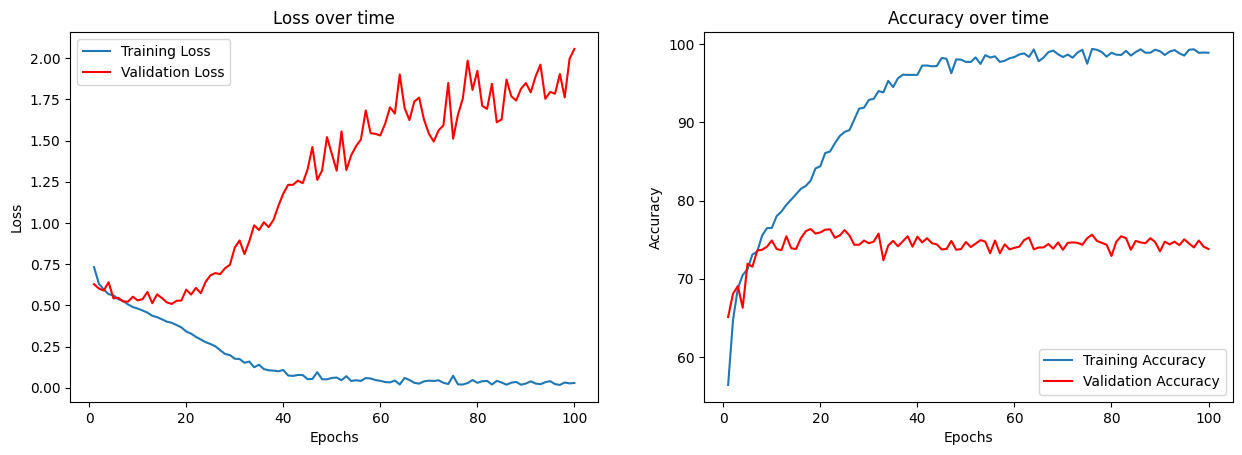

In [38]:
x_index = range(1, epochs+1, 1)

fig, axs = plt.subplots(1, 2)
fig.set_figwidth(15)

axs[0].plot(x_index, training_loss_more_kernels, label="Training Loss")
axs[0].plot(x_index, val_loss_more_kernels, color='red', label="Validation Loss")
axs[0].set_title("Loss over time")
axs[0].legend()
axs[0].set_xlabel("Epochs")
axs[0].set_ylabel("Loss")

axs[1].plot(x_index, training_acc_more_kernels, label="Training Accuracy")
axs[1].plot(x_index, val_acc_more_kernels, color='red', label="Validation Accuracy")
axs[1].set_title("Accuracy over time")
axs[1].legend()
axs[1].set_xlabel("Epochs")
axs[1].set_ylabel("Accuracy")

print(np.min(training_loss_more_kernels), np.argmin(training_loss_more_kernels, axis=0))
print(np.max(training_acc_more_kernels), np.argmax(training_acc_more_kernels, axis=0))
print(np.min(val_loss_more_kernels), np.argmin(val_loss_more_kernels, axis=0), val_acc_more_kernels[np.argmin(val_loss_more_kernels, axis=0)])

In [39]:
# load the best train model
lenet_train_more_kernels = LeNet_more_kernels()
lenet_train_more_kernels.load_state_dict(torch.load(best_model_train_path_more_kernels))
lenet_train_more_kernels.to(device)

# load the best val model
lenet_val_more_kernels = LeNet_more_kernels()
lenet_val_more_kernels.load_state_dict(torch.load(best_model_val_path_more_kernels))
lenet_val_more_kernels.to(device)

success = 0
counter = 0
with torch.no_grad():
    for data in testloader:
        im, ground_truth = data

        # Move tensors to GPU for doing model testing
        im = im.to(device)
        ground_truth = ground_truth.to(device)
        
        op = lenet_train_more_kernels(im)        
        _, pred = torch.max(op.data, 1)
        counter += ground_truth.size(0)
        success += (pred == ground_truth).sum().item()

print(f'Train Model accuracy on {len(testloader.dataset)} images from test dataset: %5.3f %%' % (100 * success / counter))

success = 0
counter = 0
with torch.no_grad():
    for data in testloader:
        im, ground_truth = data

        # Move tensors to GPU for doing model testing
        im = im.to(device)
        ground_truth = ground_truth.to(device)
        
        op = lenet_val_more_kernels(im)        
        _, pred = torch.max(op.data, 1)
        counter += ground_truth.size(0)
        success += (pred == ground_truth).sum().item()

print(f'Validation Model accuracy on {len(testloader.dataset)} images from test dataset: %5.3f %%' % (100 * success / counter))

Train Model accuracy on 2023 images from test dataset: 73.999 %
Validation Model accuracy on 2023 images from test dataset: 76.075 %


In [40]:
classes = ['cat', 'dog']

class_success = list(0. for i in range(2))
class_counter = list(0. for i in range(2))

with torch.no_grad():
    for data in testloader:
        im, ground_truth = data

        # Move tensors to GPU for doing model testing
        im = im.to(device)
        
        op = lenet_train_more_kernels(im)
        _, pred = torch.max(op, 1)

        # Move tensors back to CPU
        pred = pred.cpu()
        im = im.cpu()
        ground_truth = ground_truth.cpu()
        
        c = (pred == ground_truth).squeeze()
        for i in range(2023):
            ground_truth_curr = ground_truth[i]
            class_success[ground_truth_curr] += c[i].item()
            class_counter[ground_truth_curr] += 1

for i in range(2):
    print('Train Model accuracy for class %5s : %5.3f %%' % (classes[i], 100 * class_success[i] / class_counter[i]))

class_success = list(0. for i in range(2))
class_counter = list(0. for i in range(2))

with torch.no_grad():
    for data in testloader:
        im, ground_truth = data

        # Move tensors to GPU for doing model testing
        im = im.to(device)
        
        op = lenet_val_more_kernels(im)
        _, pred = torch.max(op, 1)

        # Move tensors back to CPU
        pred = pred.cpu()
        im = im.cpu()
        ground_truth = ground_truth.cpu()
        
        c = (pred == ground_truth).squeeze()
        for i in range(2023):
            ground_truth_curr = ground_truth[i]
            class_success[ground_truth_curr] += c[i].item()
            class_counter[ground_truth_curr] += 1

for i in range(2):
    print('Validation Model accuracy for class %5s : %5.3f %%' % (classes[i], 100 * class_success[i] / class_counter[i]))

Train Model accuracy for class   cat : 75.569 %
Train Model accuracy for class   dog : 72.431 %
Validation Model accuracy for class   cat : 84.965 %
Validation Model accuracy for class   dog : 67.194 %


In [43]:
# Recalculate the mean / standard deviation of the larger images

train_transform = transforms.Compose([transforms.RandomHorizontalFlip(),
                                      transforms.Resize(size=(48,48), antialias=True),
                                      transforms.ToTensor()])

train_dataset = torchvision.datasets.ImageFolder(root="catdog/training_set", transform=train_transform)

trainloader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)

mean, std = batch_mean_and_sd(trainloader)
print("mean and std: \n", mean, std)

mean and std: 
 tensor([0.4883, 0.4551, 0.4174]) tensor([0.2493, 0.2423, 0.2450])


### Training, Part 6

The images are resized to 48x48 instead of 32x32. A different neural network will need to be used, and different normalisation variables will be used as well

In [44]:
train_transform = transforms.Compose([transforms.RandomHorizontalFlip(),
                                      transforms.Resize(size=(48,48), antialias=True),
                                      transforms.ToTensor(),
                                      transforms.Normalize((0.4883, 0.4551, 0.4174), (0.2493, 0.2423, 0.2450))])

train_dataset = torchvision.datasets.ImageFolder(root="catdog/training_set", transform=train_transform)

trainloader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)

test_transform = transforms.Compose([transforms.Resize(size=(48,48), antialias=True), transforms.ToTensor(), transforms.Normalize((0.4883, 0.4551, 0.4174), (0.2493, 0.2423, 0.2450))])

test_dataset = torchvision.datasets.ImageFolder(root="catdog/test_set", transform=test_transform)

testloader = torch.utils.data.DataLoader(test_dataset, batch_size=len(test_dataset), shuffle=False)

# paths to save the best model on training, and the best model on validation
best_model_train_path_bigger_inputs = './best_train_model_bigger_inputs.pth'
best_model_val_path_bigger_inputs = './best_val_model_bigger_inputs.pth'

class LeNet_bigger_inputs(nn.Module):

    def __init__(self):
        super(LeNet_bigger_inputs, self).__init__()
        # 3 input image channel, 6 output feature maps and 5x5 conv kernel
        self.cn1 = nn.Conv2d(3, 6, 5) # (48-5+0)/1 + 1 => 44 * 44 * 6
        self.maxpool1 = nn.MaxPool2d(2)
        # After pooling, 44/2 => 22 * 22 * 10
        # 6 input image channel, 16 output feature maps and 5x5 conv kernel
        self.cn2 = nn.Conv2d(6, 16, 5) # (22-5+0)/1 + 1 = 18 * 18 * 16
        self.maxpool2 = nn.MaxPool2d(2)
        # After pooling, 18/2 => 9 * 9 * 16
        self.flatten1 = nn.Flatten()
        self.fc1 = nn.Linear(16 * 9 * 9, 120)  # 5*5 is the spatial dimension at this layer
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Convolution with 5x5 kernel
        x = F.relu(self.cn1(x))
        # Max pooling over a (2, 2) window        
        x = self.maxpool1(x)
        # Convolution with 5x5 kernel
        x = F.relu(self.cn2(x))
        # Max pooling over a (2, 2) window        
        x = self.maxpool2(x)
        # Flatten spatial and depth dimensions into a single vector        
        x = self.flatten1(x)
        # Fully connected operations
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def flattened_features(self, x):
        # all except the first (batch) dimension
        size = x.size()[1:]  
        num_feats = 1
        for s in size:
            num_feats *= s
        return num_feats

lenet_bigger_inputs = LeNet_bigger_inputs()
lenet_bigger_inputs.to(device)
print(lenet_bigger_inputs)

LeNet_bigger_inputs(
  (cn1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (cn2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (maxpool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (flatten1): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=1296, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [45]:
# define optimizer
optim = torch.optim.Adam(lenet_bigger_inputs.parameters(), lr=0.001)

training_loss_bigger_inputs = []
training_acc_bigger_inputs = []
val_loss_bigger_inputs = []
val_acc_bigger_inputs = []
epochs = 100

best_train_loss = 0.0
best_val_loss = 0.0

# training loop over the dataset multiple times
for epoch in range(epochs):  
    t_loss, t_acc = train(lenet_bigger_inputs, trainloader, optim, epoch)        
    training_loss_bigger_inputs.append(t_loss)
    training_acc_bigger_inputs.append(t_acc)
    
    v_loss, v_acc = test(lenet_bigger_inputs, testloader)
    val_loss_bigger_inputs.append(v_loss)
    val_acc_bigger_inputs.append(v_acc)
    print()
    if best_train_loss > t_loss or best_train_loss <= 0:
        print("Better training loss, saving model.")
        best_train_loss = t_loss
        torch.save(lenet_bigger_inputs.state_dict(), best_model_train_path_bigger_inputs)
    if best_val_loss > v_loss or best_val_loss <= 0:
        print("Better validation loss, saving model.")
        best_val_loss = v_loss
        torch.save(lenet_bigger_inputs.state_dict(), best_model_val_path_bigger_inputs)

# Save model for future use
model_path = './base_model_bigger_inputs_100_epoch.pth'
torch.save(lenet_bigger_inputs.state_dict(), model_path)

print('Finished Training')

[Epoch number : 1] accuracy: 58.738, loss: 0.700
LeNet accuracy on 2023 images from test dataset: 66.2382600098863. Loss: 0.6168460249900818

Better training loss, saving model.
Better validation loss, saving model.
[Epoch number : 2] accuracy: 66.421, loss: 0.614
LeNet accuracy on 2023 images from test dataset: 68.90756302521008. Loss: 0.5929920077323914

Better training loss, saving model.
Better validation loss, saving model.
[Epoch number : 3] accuracy: 69.357, loss: 0.583
LeNet accuracy on 2023 images from test dataset: 65.99110232328225. Loss: 0.6107671856880188

Better training loss, saving model.
[Epoch number : 4] accuracy: 71.918, loss: 0.554
LeNet accuracy on 2023 images from test dataset: 73.30696984676223. Loss: 0.5382460951805115

Better training loss, saving model.
Better validation loss, saving model.
[Epoch number : 5] accuracy: 73.192, loss: 0.534
LeNet accuracy on 2023 images from test dataset: 74.19673751853682. Loss: 0.5341659784317017

Better training loss, saving

### Graph of Loss/Accuracy Over Time

### Graph of Loss/Accuracy over Time

0.008475004674310692 88
99.68769519050593 74
0.505607008934021 9 75.82797825012358


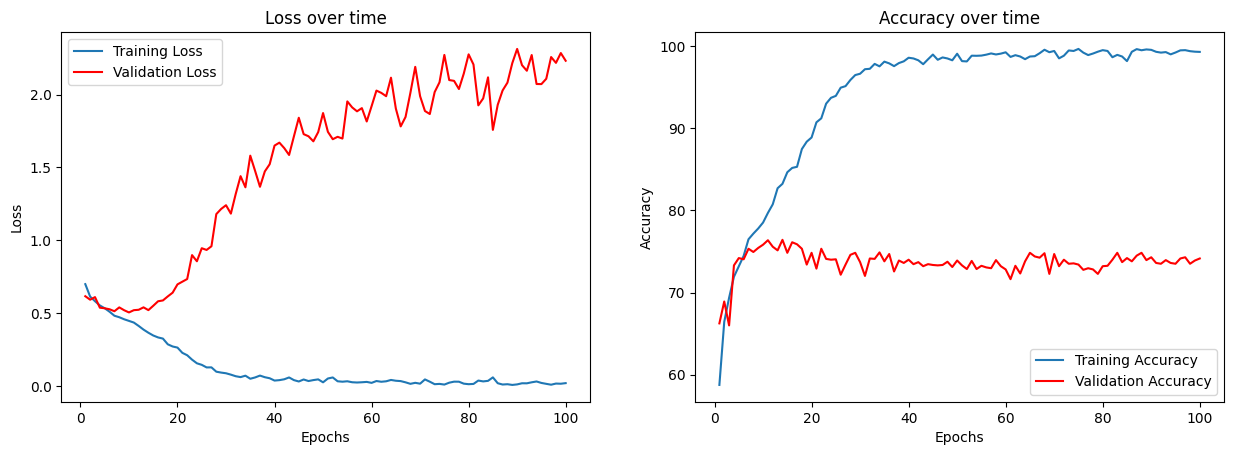

In [46]:
x_index = range(1, epochs+1, 1)

fig, axs = plt.subplots(1, 2)
fig.set_figwidth(15)

axs[0].plot(x_index, training_loss_bigger_inputs, label="Training Loss")
axs[0].plot(x_index, val_loss_bigger_inputs, color='red', label="Validation Loss")
axs[0].set_title("Loss over time")
axs[0].legend()
axs[0].set_xlabel("Epochs")
axs[0].set_ylabel("Loss")

axs[1].plot(x_index, training_acc_bigger_inputs, label="Training Accuracy")
axs[1].plot(x_index, val_acc_bigger_inputs, color='red', label="Validation Accuracy")
axs[1].set_title("Accuracy over time")
axs[1].legend()
axs[1].set_xlabel("Epochs")
axs[1].set_ylabel("Accuracy")

print(np.min(training_loss_bigger_inputs), np.argmin(training_loss_bigger_inputs, axis=0))
print(np.max(training_acc_bigger_inputs), np.argmax(training_acc_bigger_inputs, axis=0))
print(np.min(val_loss_bigger_inputs), np.argmin(val_loss_bigger_inputs, axis=0), val_acc_bigger_inputs[np.argmin(val_loss_bigger_inputs, axis=0)])

### Loss/Accuracy Analysis

The best validation loss here is 0.506, the best out of all models so far, but at a relatively early epoch of 9.

In [47]:
# load the best train model
lenet_train_bigger_inputs = LeNet_bigger_inputs()
lenet_train_bigger_inputs.load_state_dict(torch.load(best_model_train_path_bigger_inputs))
lenet_train_bigger_inputs.to(device)

# load the best val model
lenet_val_bigger_inputs = LeNet_bigger_inputs()
lenet_val_bigger_inputs.load_state_dict(torch.load(best_model_val_path_bigger_inputs))
lenet_val_bigger_inputs.to(device)

success = 0
counter = 0
with torch.no_grad():
    for data in testloader:
        im, ground_truth = data

        # Move tensors to GPU for doing model testing
        im = im.to(device)
        ground_truth = ground_truth.to(device)
        
        op = lenet_train_bigger_inputs(im)        
        _, pred = torch.max(op.data, 1)
        counter += ground_truth.size(0)
        success += (pred == ground_truth).sum().item()

print(f'Train Model accuracy on {len(testloader.dataset)} images from test dataset: %5.3f %%' % (100 * success / counter))

success = 0
counter = 0
with torch.no_grad():
    for data in testloader:
        im, ground_truth = data

        # Move tensors to GPU for doing model testing
        im = im.to(device)
        ground_truth = ground_truth.to(device)
        
        op = lenet_val_bigger_inputs(im)        
        _, pred = torch.max(op.data, 1)
        counter += ground_truth.size(0)
        success += (pred == ground_truth).sum().item()

print(f'Validation Model accuracy on {len(testloader.dataset)} images from test dataset: %5.3f %%' % (100 * success / counter))

Train Model accuracy on 2023 images from test dataset: 73.950 %
Validation Model accuracy on 2023 images from test dataset: 75.828 %


In [49]:
classes = ['cat', 'dog']

class_success = list(0. for i in range(2))
class_counter = list(0. for i in range(2))

with torch.no_grad():
    for data in testloader:
        im, ground_truth = data

        # Move tensors to GPU for doing model testing
        im = im.to(device)
        
        op = lenet_train_bigger_inputs(im)
        _, pred = torch.max(op, 1)

        # Move tensors back to CPU
        pred = pred.cpu()
        im = im.cpu()
        ground_truth = ground_truth.cpu()
        
        c = (pred == ground_truth).squeeze()
        for i in range(2023):
            ground_truth_curr = ground_truth[i]
            class_success[ground_truth_curr] += c[i].item()
            class_counter[ground_truth_curr] += 1

for i in range(2):
    print('Train Model accuracy for class %5s : %5.3f %%' % (classes[i], 100 * class_success[i] / class_counter[i]))

class_success = list(0. for i in range(2))
class_counter = list(0. for i in range(2))

with torch.no_grad():
    for data in testloader:
        im, ground_truth = data

        # Move tensors to GPU for doing model testing
        im = im.to(device)
        
        op = lenet_val_bigger_inputs(im)
        _, pred = torch.max(op, 1)

        # Move tensors back to CPU
        pred = pred.cpu()
        im = im.cpu()
        ground_truth = ground_truth.cpu()
        
        c = (pred == ground_truth).squeeze()
        for i in range(2023):
            ground_truth_curr = ground_truth[i]
            class_success[ground_truth_curr] += c[i].item()
            class_counter[ground_truth_curr] += 1

for i in range(2):
    print('Validation Model accuracy for class %5s : %5.3f %%' % (classes[i], 100 * class_success[i] / class_counter[i]))

Train Model accuracy for class   cat : 72.206 %
Train Model accuracy for class   dog : 75.692 %
Validation Model accuracy for class   cat : 71.316 %
Validation Model accuracy for class   dog : 80.336 %


### Training, Part 7 (final)

Bigger image sizes, more kernels, and inclusion of some dropout layers are used for the final model. It is hypothesised and hoped that the model performs the best out of all 7 experiments.

In [50]:
# All consolidated options

train_transform = transforms.Compose([transforms.RandomHorizontalFlip(),
                                      transforms.Resize(size=(48,48), antialias=True),
                                      transforms.ToTensor(),
                                      transforms.Normalize((0.4883, 0.4551, 0.4174), (0.2493, 0.2423, 0.2450))])

train_dataset = torchvision.datasets.ImageFolder(root="catdog/training_set", transform=train_transform)

trainloader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)

test_transform = transforms.Compose([transforms.Resize(size=(48,48), antialias=True), transforms.ToTensor(), transforms.Normalize((0.4883, 0.4551, 0.4174), (0.2493, 0.2423, 0.2450))])

test_dataset = torchvision.datasets.ImageFolder(root="catdog/test_set", transform=test_transform)

testloader = torch.utils.data.DataLoader(test_dataset, batch_size=len(test_dataset), shuffle=False)

# paths to save the best model on training, and the best model on validation
best_model_train_path_consolidated = './best_train_model_consolidated.pth'
best_model_val_path_consolidated = './best_val_model_consolidated.pth'

class LeNet_consolidated(nn.Module):

    def __init__(self):
        super(LeNet_consolidated, self).__init__()
        # 3 input image channel, 6 output feature maps and 5x5 conv kernel
        self.cn1 = nn.Conv2d(3, 10, 5) # (48-5+0)/1 + 1 => 44 * 44 * 6
        self.maxpool1 = nn.MaxPool2d(2)
        self.dropout1 = nn.Dropout(0.2) 
        # After pooling, 44/2 => 22 * 22 * 10
        # 6 input image channel, 16 output feature maps and 5x5 conv kernel
        self.cn2 = nn.Conv2d(10, 24, 5) # (22-5+0)/1 + 1 = 18 * 18 * 16
        self.maxpool2 = nn.MaxPool2d(2)
        # After pooling, 18/2 => 9 * 9 * 16
        self.flatten1 = nn.Flatten()
        self.dropout2 = nn.Dropout(0.05) # Experimentation
        self.fc1 = nn.Linear(24 * 9 * 9, 120)  # 5*5 is the spatial dimension at this layer
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Convolution with 5x5 kernel
        x = F.relu(self.cn1(x))
        # Max pooling over a (2, 2) window        
        x = self.maxpool1(x)
        x = self.dropout1(x)
        # Convolution with 5x5 kernel
        x = F.relu(self.cn2(x))
        # Max pooling over a (2, 2) window        
        x = self.maxpool2(x)
        # Flatten spatial and depth dimensions into a single vector        
        x = self.flatten1(x)
        x = self.dropout2(x)
        # Fully connected operations
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def flattened_features(self, x):
        # all except the first (batch) dimension
        size = x.size()[1:]  
        num_feats = 1
        for s in size:
            num_feats *= s
        return num_feats

lenet_consolidated = LeNet_consolidated()
lenet_consolidated.to(device)
print(lenet_bigger_inputs)

LeNet_bigger_inputs(
  (cn1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (cn2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (maxpool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (flatten1): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=1296, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [51]:
# define optimizer
optim = torch.optim.Adam(lenet_consolidated.parameters(), lr=0.001)

training_loss_consolidated = []
training_acc_consolidated = []
val_loss_consolidated = []
val_acc_consolidated = []
epochs = 100

best_train_loss = 0.0
best_val_loss = 0.0

# training loop over the dataset multiple times
for epoch in range(epochs):  
    t_loss, t_acc = train(lenet_consolidated, trainloader, optim, epoch)        
    training_loss_consolidated.append(t_loss)
    training_acc_consolidated.append(t_acc)
    
    v_loss, v_acc = test(lenet_consolidated, testloader)
    val_loss_consolidated.append(v_loss)
    val_acc_consolidated.append(v_acc)
    print()
    if best_train_loss > t_loss or best_train_loss <= 0:
        print("Better training loss, saving model.")
        best_train_loss = t_loss
        torch.save(lenet_consolidated.state_dict(), best_model_train_path_consolidated)
    if best_val_loss > v_loss or best_val_loss <= 0:
        print("Better validation loss, saving model.")
        best_val_loss = v_loss
        torch.save(lenet_consolidated.state_dict(), best_model_val_path_consolidated)

# Save model for future use
model_path = './base_model_consolidated_100_epoch.pth'
torch.save(lenet_consolidated.state_dict(), model_path)

print('Finished Training')

[Epoch number : 1] accuracy: 57.539, loss: 0.696
LeNet accuracy on 2023 images from test dataset: 65.29906080079091. Loss: 0.624436616897583

Better training loss, saving model.
Better validation loss, saving model.
[Epoch number : 2] accuracy: 65.696, loss: 0.621
LeNet accuracy on 2023 images from test dataset: 65.29906080079091. Loss: 0.6221644878387451

Better training loss, saving model.
Better validation loss, saving model.
[Epoch number : 3] accuracy: 69.644, loss: 0.583
LeNet accuracy on 2023 images from test dataset: 71.13198220464656. Loss: 0.5639317035675049

Better training loss, saving model.
Better validation loss, saving model.
[Epoch number : 4] accuracy: 71.330, loss: 0.557
LeNet accuracy on 2023 images from test dataset: 71.62629757785467. Loss: 0.5517398715019226

Better training loss, saving model.
Better validation loss, saving model.
[Epoch number : 5] accuracy: 73.117, loss: 0.536
LeNet accuracy on 2023 images from test dataset: 72.96094908551656. Loss: 0.54650723

### Graph of Loss/Accuracy over time

0.03591721586440597 82
98.82573391630231 82
0.49426916241645813 12 75.72911517548195


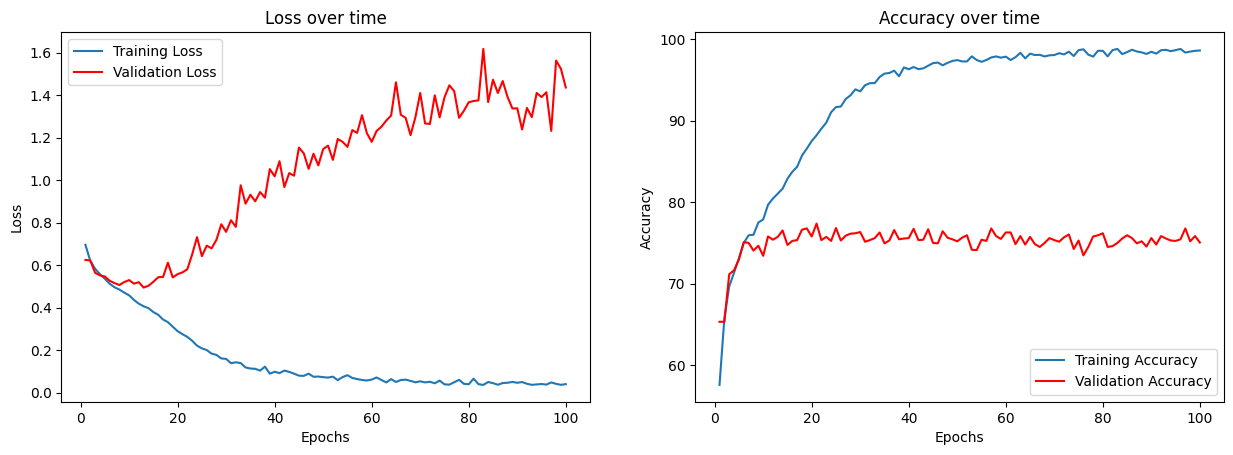

In [52]:
x_index = range(1, epochs+1, 1)

fig, axs = plt.subplots(1, 2)
fig.set_figwidth(15)

axs[0].plot(x_index, training_loss_consolidated, label="Training Loss")
axs[0].plot(x_index, val_loss_consolidated, color='red', label="Validation Loss")
axs[0].set_title("Loss over time")
axs[0].legend()
axs[0].set_xlabel("Epochs")
axs[0].set_ylabel("Loss")

axs[1].plot(x_index, training_acc_consolidated, label="Training Accuracy")
axs[1].plot(x_index, val_acc_consolidated, color='red', label="Validation Accuracy")
axs[1].set_title("Accuracy over time")
axs[1].legend()
axs[1].set_xlabel("Epochs")
axs[1].set_ylabel("Accuracy")

print(np.min(training_loss_consolidated), np.argmin(training_loss_consolidated, axis=0))
print(np.max(training_acc_consolidated), np.argmax(training_acc_consolidated, axis=0))
print(np.min(val_loss_consolidated), np.argmin(val_loss_consolidated, axis=0), val_acc_consolidated[np.argmin(val_loss_consolidated, axis=0)])

### Analysis

The combined model has the best possible loss at 0.4943.

In [53]:
# load the best train model
lenet_train_consolidated = LeNet_consolidated()
lenet_train_consolidated.load_state_dict(torch.load(best_model_train_path_consolidated))
lenet_train_consolidated.to(device)

# load the best val model
lenet_val_consolidated = LeNet_consolidated()
lenet_val_consolidated.load_state_dict(torch.load(best_model_val_path_consolidated))
lenet_val_consolidated.to(device)

success = 0
counter = 0
with torch.no_grad():
    for data in testloader:
        im, ground_truth = data

        # Move tensors to GPU for doing model testing
        im = im.to(device)
        ground_truth = ground_truth.to(device)
        
        op = lenet_train_consolidated(im)        
        _, pred = torch.max(op.data, 1)
        counter += ground_truth.size(0)
        success += (pred == ground_truth).sum().item()

print(f'Train Model accuracy on {len(testloader.dataset)} images from test dataset: %5.3f %%' % (100 * success / counter))

success = 0
counter = 0
with torch.no_grad():
    for data in testloader:
        im, ground_truth = data

        # Move tensors to GPU for doing model testing
        im = im.to(device)
        ground_truth = ground_truth.to(device)
        
        op = lenet_val_consolidated(im)        
        _, pred = torch.max(op.data, 1)
        counter += ground_truth.size(0)
        success += (pred == ground_truth).sum().item()

print(f'Validation Model accuracy on {len(testloader.dataset)} images from test dataset: %5.3f %%' % (100 * success / counter))

Train Model accuracy on 2023 images from test dataset: 74.691 %
Validation Model accuracy on 2023 images from test dataset: 76.471 %


In [54]:
classes = ['cat', 'dog']

class_success = list(0. for i in range(2))
class_counter = list(0. for i in range(2))

with torch.no_grad():
    for data in testloader:
        im, ground_truth = data

        # Move tensors to GPU for doing model testing
        im = im.to(device)
        
        op = lenet_train_consolidated(im)
        _, pred = torch.max(op, 1)

        # Move tensors back to CPU
        pred = pred.cpu()
        im = im.cpu()
        ground_truth = ground_truth.cpu()
        
        c = (pred == ground_truth).squeeze()
        for i in range(2023):
            ground_truth_curr = ground_truth[i]
            class_success[ground_truth_curr] += c[i].item()
            class_counter[ground_truth_curr] += 1

for i in range(2):
    print('Train Model accuracy for class %5s : %5.3f %%' % (classes[i], 100 * class_success[i] / class_counter[i]))
    
class_success = list(0. for i in range(2))
class_counter = list(0. for i in range(2))

with torch.no_grad():
    for data in testloader:
        im, ground_truth = data

        # Move tensors to GPU for doing model testing
        im = im.to(device)
        
        op = lenet_val_consolidated(im)
        _, pred = torch.max(op, 1)

        # Move tensors back to CPU
        pred = pred.cpu()
        im = im.cpu()
        ground_truth = ground_truth.cpu()
        
        c = (pred == ground_truth).squeeze()
        for i in range(2023):
            ground_truth_curr = ground_truth[i]
            class_success[ground_truth_curr] += c[i].item()
            class_counter[ground_truth_curr] += 1

for i in range(2):
    print('Validation Model accuracy for class %5s : %5.3f %%' % (classes[i], 100 * class_success[i] / class_counter[i]))

Train Model accuracy for class   cat : 77.646 %
Train Model accuracy for class   dog : 73.320 %
Validation Model accuracy for class   cat : 80.712 %
Validation Model accuracy for class   dog : 71.739 %


## Conclusion
Loren ipsum

## Future Work
Experimentation with batch normalisation, and different match sizes, could be used.\
K-Fold Validation could be used for better evaluations of the lowest possible validation/training loss.\
Experimenting with other optimisers, and other optimiser hyperparameters could result in different results.